IA & Data science (LU3IN0226) -- 2024-2025
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# TD-TME08: arbres de décision numériques, apprentissage non-supervisé

L'objectif de ce TP est d'implémenter des algorithmes d'apprentissage non-supervisé, en particulier, l'algorithme de clutering hiérarchique ascendant.

<font color="RED" size="+1">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Yuxiang ZHANG & Antoine LECOMTE

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-08</tt> et rajouter à la suite de <tt>tme-08</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-08-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">avant la séance suivante</font>.

**Le compte-rendu est soumis sur la page Moodle.**


## Préparation

L'archive récupérée avec ce fichier contient aussi le répertoire <code>data</code> qui contient les bases pour expérimenter vos fonctions.

In [1]:
# - - - - - - - - - - - - - - - - - -
# imports utiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mtpl
%matplotlib inline  

import math
import time
import sys

# Les instructions suivantes sont utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# - - - - - - - - - - - - - - - - - -
# Information sur l'environnent utilisé ici:
print("Version python et des librairies:")
print("\tPython ",sys.version)
print("\tpandas: ",pd.__version__)
print("\tnumpy: ",np.__version__)
print("\tmatplotlib: ",mtpl.__version__)

Version python et des librairies:
	Python  3.9.6 (default, Nov 11 2024, 03:15:38) 
[Clang 16.0.0 (clang-1600.0.26.6)]
	pandas:  2.2.3
	numpy:  2.0.2
	matplotlib:  3.9.4


In [2]:
# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev



On introduit dans ce TME la librairie Python seaborn (voir: <a href="https://seaborn.pydata.org/">https://seaborn.pydata.org/</a>) qui offre des outils de visualisation assez intéressants. On l'utilise aussi pour accéder à des jeux de données classiques.

In [3]:
# Importation de la librairie seaborn:
import seaborn as sns


In [4]:
print("seaborn: ",sns.__version__)

# Remarque: il n'est pas nécessaire d'avoir exactement cette version-là...

seaborn:  0.13.2


## Arbres de décision numériques

Pour tester la construction d'arbres de décision numériques, on utilise la base des Iris de Fischer (4 variables de description numériques, et 3 valeurs de classes à reconnaître).

In [5]:
# Le dataset des iris est fourni dans le package seaborn, on l'obtient ainsi:
iris_df = sns.load_dataset('iris')

# Contenu du dataframe :
iris_df

# Remarque: dans ce dataframe, la colonne "species" est la colonne de la classe. 
# C'est la seule colonne qui ne contient pas de valeurs réelles.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


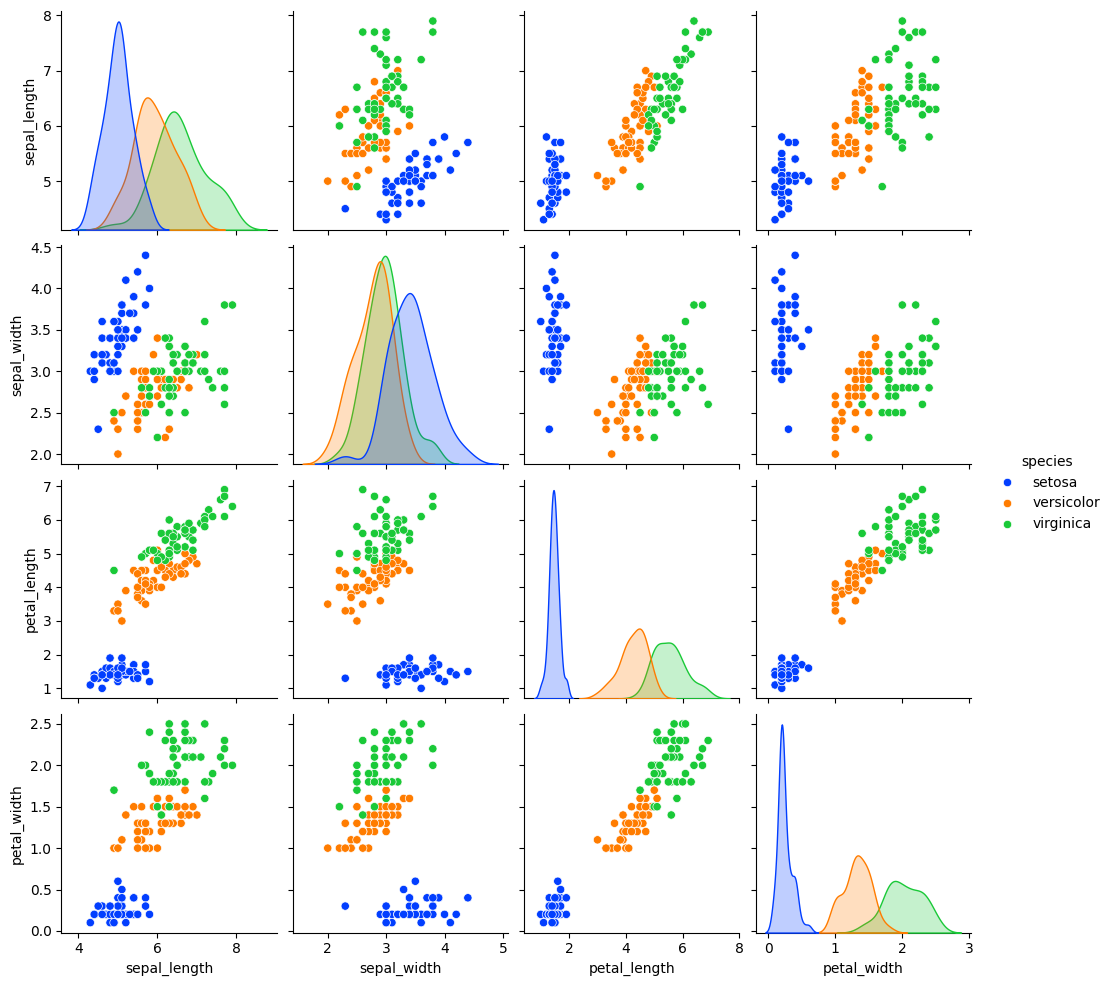

In [6]:
# Avec Seaborn, on peut construire le corrélogramme de ce dataset:
sns.pairplot(iris_df,hue='species',palette='bright')


<font color="RED" size="+1"><b>[Q]</b></font> Examiner ce corrélogramme et expliquer ce qu'il représente:
- pourquoi certains affichages représentent des points et d'autres des courbes ?

De plus, en examinant ce corrélogramme : 
- est-ce que le problème de classification des iris semble être un problème difficile ? Expliquez ?
- à votre avis, sans faire de calculs, quels sont les 2 attributs qui semblent le plus discrimant pour reconnaître la valeur de la classe ?

<i>Rajouter ci-dessous une boîte "markdown" pour donner vos réponses.</i>

Q1:
Le corrélogramme affiche des relations entre différentes variables du dataset de l'Iris.

Les affichages en nuages de points représentent les relations entre deux variables numériques. Chaque point correspond à une observation du dataset.

Les courbes (histogrammes avec densité estimée) se trouvent sur la diagonale et représentent la distribution d'une seule variable pour chaque espèce. Cela permet d'observer comment chaque variable est distribuée pour les différentes classes (Setosa, Versicolor, Virginica).

Q2:
En examinant le corrélogramme, on observe que :

La classe Setosa (points bleus) est très bien séparée des deux autres classes pour presque toutes les combinaisons de variables.

Les classes Versicolor (orange) et Virginica (vert) se chevauchent davantage, ce qui peut rendre leur classification plus difficile.

Globalement, la classification des iris semble être plutôt facile pour la classe Setosa, mais un peu plus complexe pour distinguer Versicolor et Virginica.

Q3:
À première vue, les attributs pétale longueur (petal_length) et pétale largeur (petal_width) semblent être les plus discriminants. En effet, la séparation entre les classes y est très marquée, notamment pour la classe Setosa qui est complètement isolée des autres. Cela signifie que ces deux variables permettent de mieux distinguer les différentes espèces d'iris.

### Préparation

In [7]:
# Passer du dataframe à des arrays:
iris_desc = np.array(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris_label = np.array(iris_df['species']) # species est la colonne contenant le label/la classe.

# obtenir les noms des colonnes :
iris_noms = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

print("Noms des features: ",iris_noms)
print("Noms des labels: ",np.unique(iris_label))

Noms des features:  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Noms des labels:  ['setosa' 'versicolor' 'virginica']


In [8]:
# Exemple : fleurs dont la 'sepal_length' vaut 6.3
iris_label[iris_desc[:,0] == 6.3]

array(['versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica'], dtype=object)

<font color="RED" size="+1"><b>[Q]</b></font> Vérifier que la fonction <code>classe_majoritaire</code> et la fonction d'<code>entropie</code> écrites lors du TME précédent sont bien installées dans votre librairie.



In [9]:
# Vérification sur nos données:
liste_classes = iris_label[iris_desc[:,0] == 6.3]
classe_majo = classif.classe_majoritaire(liste_classes)

print("Les classes: ", liste_classes)
print("Classe majoritaire: ", classe_majo)
print(f'Entropie: {classif.entropie(liste_classes):0.3f}')

Les classes:  ['versicolor' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica']
Classe majoritaire:  virginica
Entropie: 0.918


### Discrétisation des attributs numériques

<div class="alert alert-block alert-success">
    
Comme cela a été dit en cours, **discrétiser** un attribut numérique consiste en trouver un seuil de coupure dans son ensemble de valeurs après les avoir ordonnées.
</div>    


Ci-dessous, la méthode <code>discretise</code> qui permet de trouver le seuil de coupure optimal dans un ensemble de valeurs associées à des classes (labels).


In [10]:
def discretise(m_desc, m_class, num_col):
    """ input:
            - m_desc : (np.array) matrice des descriptions toutes numériques
            - m_class : (np.array) matrice des classes (correspondant à m_desc)
            - num_col : (int) numéro de colonne de m_desc à considérer
            - nb_classes : (int) nombre initial de labels dans le dataset (défaut: 2)
        output: tuple : ((seuil_trouve, entropie), (liste_coupures,liste_entropies))
            -> seuil_trouve (float): meilleur seuil trouvé
            -> entropie (float): entropie du seuil trouvé (celle qui minimise)
            -> liste_coupures (List[float]): la liste des valeurs seuils qui ont été regardées
            -> liste_entropies (List[float]): la liste des entropies correspondantes aux seuils regardés
            (les 2 listes correspondent et sont donc de même taille)
            REMARQUE: dans le cas où il y a moins de 2 valeurs d'attribut dans m_desc, aucune discrétisation
            n'est possible, on rend donc ((None , +Inf), ([],[])) dans ce cas            
    """
    # Liste triée des valeurs différentes présentes dans m_desc:
    l_valeurs = np.unique(m_desc[:,num_col])
    
    # Si on a moins de 2 valeurs, pas la peine de discrétiser:
    if (len(l_valeurs) < 2):
        return ((None, float('Inf')), ([],[]))
    
    # Initialisation
    best_seuil = None
    best_entropie = float('Inf')
    
    # pour voir ce qui se passe, on va sauver les entropies trouvées et les points de coupures:
    liste_entropies = []
    liste_coupures = []
    
    nb_exemples = len(m_class)
    
    for v in l_valeurs:
        cl_inf = m_class[m_desc[:,num_col]<=v]
        cl_sup = m_class[m_desc[:,num_col]>v]
        nb_inf = len(cl_inf)
        nb_sup = len(cl_sup)
        
        # calcul de l'entropie de la coupure
        val_entropie_inf = classif.entropie(cl_inf) # entropie de l'ensemble des inf
        val_entropie_sup = classif.entropie(cl_sup) # entropie de l'ensemble des sup
        
        val_entropie = (nb_inf / float(nb_exemples)) * val_entropie_inf \
                       + (nb_sup / float(nb_exemples)) * val_entropie_sup
        
        # Ajout de la valeur trouvée pour retourner l'ensemble des entropies trouvées:
        liste_coupures.append(v)
        liste_entropies.append(val_entropie)
        
        # si cette coupure minimise l'entropie, on mémorise ce seuil et son entropie:
        if (best_entropie > val_entropie):
            best_entropie = val_entropie
            best_seuil = v
    
    return (best_seuil, best_entropie), (liste_coupures,liste_entropies)

Pour  sepal_length
Seuil de coupure trouvé: 5.500 et son entropie: 0.64843


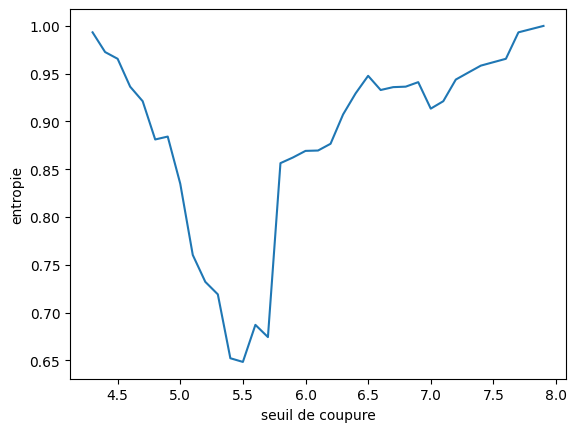

In [11]:
# Exemple d'utilisation:
numero_colonne = 0
resultat, liste_vals = discretise(iris_desc,iris_label,numero_colonne)

print("Pour ", iris_noms[numero_colonne])
print(f"Seuil de coupure trouvé: {resultat[0]:1.3f} et son entropie: {resultat[1]:1.5f}" )

# affichage de la variation de l'entropie en fonction du choix du seuil:
X,Y = liste_vals
plt.plot(X,Y)
plt.ylabel('entropie')
plt.xlabel('seuil de coupure')
plt.show()

Pour  petal_length
Seuil de coupure trouvé: 1.700 et son entropie: 0.48036


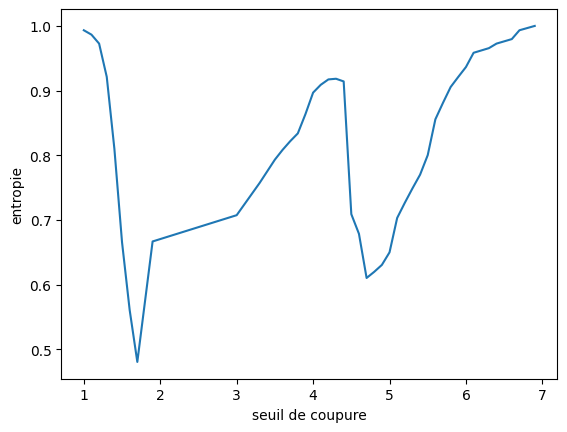

In [12]:
# Autre exemple:
numero_colonne = 2

resultat, liste_vals = discretise(iris_desc,iris_label,numero_colonne)

print("Pour ", iris_noms[numero_colonne])
print(f"Seuil de coupure trouvé: {resultat[0]:1.3f} et son entropie: {resultat[1]:1.5f}" )

# affichage de la variation de l'entropie en fonction du choix du seuil:
X,Y = liste_vals
plt.plot(X,Y)
plt.ylabel('entropie')
plt.xlabel('seuil de coupure')
plt.show()

<div class="alert alert-block alert-warning">
Une fois un seuil de coupure $s$ trouvé sur un attribut $n$, on partitionne la base d'apprentissage en 2 ensembles:
- l'ensemble des exemples qui ont une valeur inférieure ou égale à $s$ pour l'attribut $n$
- l'ensemble des exemples qui ont une valeur strictement supérieure à $s$ pour l'attribut $n$
</div>    


La fonction <code>partionne</code> ci-dessous prend en argument deux numpy array $m_{desc}$ et $m_{class}$ qui représentent une base d'apprentissage, un numéro de colonne $n$ et une valeur de seuil $s$ et rend un tuple composé  de 2 tuples de numpy arrays:
- le premier tuple est composé de l'ensemble des descriptions de tous les exemples de $T$ qui ont une valeur pour la colonne $n$ inférieure ou égale à $s$ et l'ensemble de leur classe;
- le second tuple est composé de l'ensemble des descriptions de tous les exemples de $T$ qui ont une valeur pour la colonne $n$ strictement supérieure à $s$ et l'ensemble de leur classe;


In [13]:
def partitionne(m_desc,m_class,n,s):
    """ input:
            - m_desc : (np.array) matrice des descriptions toutes numériques
            - m_class : (np.array) matrice des classes (correspondant à m_desc)
            - n : (int) numéro de colonne de m_desc
            - s : (float) seuil pour le critère d'arrêt
        Hypothèse: m_desc peut être partitionné ! (il contient au moins 2 valeurs différentes)
        output: un tuple composé de 2 tuples
    """
    return ((m_desc[m_desc[:,n]<=s], m_class[m_desc[:,n]<=s]), \
            (m_desc[m_desc[:,n]>s], m_class[m_desc[:,n]>s]))

In [14]:
# Exemple d'utilisation :

# Recherche point de coupure :
numero_colonne = 3
resultat, liste_vals = discretise(iris_desc,iris_label,numero_colonne)
print(f"Seuil de coupure trouvé: {resultat[0]:1.3f} et son entropie: {resultat[1]:1.5f}" )

# partitionnement :
((left_data,left_class), (right_data,right_class)) = partitionne(iris_desc,iris_label, numero_colonne,resultat[0])

print("Nombre d'exemples à gauche : ", len(left_class), " Nombre d'exemples à droite : ", len(right_class) )

Seuil de coupure trouvé: 0.500 et son entropie: 0.45466
Nombre d'exemples à gauche :  49  Nombre d'exemples à droite :  101


### Implémentation des arbres numériques

Afin de représenter des arbres de décision numériques, on créé une nouvelle classe qui permet de définir des noeuds internes de l'arbre associés à des attributs numériques.

<b>Remarque:</b> on se place ici dans le cas où l'arbre de décision final ne contiendra que des noeuds numériques. Il n'y a donc pas à prévoir de noeud catégoriel dans cet arbre (la version générale sera abordée un peu plus loin dans ce notebook).

<font color="RED" size="+1"><b>[Q]</b></font> Compléter la classe suivante pour pouvoir classifier avec un noeud numérique.

In [15]:
import graphviz as gv   # si ce n'a pas déjà été fait...

class NoeudNumerique:
    """ Classe pour représenter des noeuds numériques d'un arbre de décision
    """
    def __init__(self, num_att=-1, nom=''):
        """ Constructeur: il prend en argument
            - num_att (int) : le numéro de l'attribut auquel il se rapporte: de 0 à ...
              si le noeud se rapporte à la classe, le numéro est -1, on n'a pas besoin
              de le préciser
            - nom (str) : une chaîne de caractères donnant le nom de l'attribut si
              il est connu (sinon, on ne met rien et le nom sera donné de façon 
              générique: "att_Numéro")
        """
        self.attribut = num_att    # numéro de l'attribut
        if (nom == ''):            # son nom si connu
            self.nom_attribut = 'att_'+str(num_att)
        else:
            self.nom_attribut = nom 
        self.seuil = None          # seuil de coupure pour ce noeud
        self.Les_fils = None       # aucun fils à la création, ils seront ajoutés
        self.classe   = None       # valeur de la classe si c'est une feuille
        
    def est_feuille(self):
        """ rend True si l'arbre est une feuille 
            c'est une feuille s'il n'a aucun fils
        """
        return self.Les_fils == None
    
    def ajoute_fils(self, val_seuil, fils_inf, fils_sup):
        """ val_seuil : valeur du seuil de coupure
            fils_inf : fils à atteindre pour les valeurs inférieures ou égales à seuil
            fils_sup : fils à atteindre pour les valeurs supérieures à seuil
        """
        if self.Les_fils == None:
            self.Les_fils = dict()            
        self.seuil = val_seuil
        self.Les_fils['inf'] = fils_inf
        self.Les_fils['sup'] = fils_sup        
    
    def ajoute_feuille(self,classe):
        """ classe: valeur de la classe
            Ce noeud devient un noeud feuille
        """
        self.classe    = classe
        self.Les_fils  = None   # normalement, pas obligatoire ici, c'est pour être sûr
        
    def classifie(self, exemple):
        """ exemple : numpy.array
            rend la classe de l'exemple (pour nous, soit +1, soit -1 en général)
            on rend la valeur 0 si l'exemple ne peut pas être classé (cf. les questions
            posées en fin de ce notebook)
        """
        if self.est_feuille():
            return self.classe
        valeur = exemple[self.attribut]
        if valeur <= self.seuil:
            return self.Les_fils['inf'].classifie(exemple)
        else:
            return self.Les_fils['sup'].classifie(exemple)

    
    def compte_feuilles(self):
        """ rend le nombre de feuilles sous ce noeud
        """
        if self.est_feuille():
            return 1
        return self.Les_fils['inf'].compte_feuilles() + self.Les_fils['sup'].compte_feuilles()
     
    def to_graph(self, g, prefixe='A'):
        """ construit une représentation de l'arbre pour pouvoir l'afficher graphiquement
            Cette fonction ne nous intéressera pas plus que ça, elle ne sera donc 
            pas expliquée            
        """
        if self.est_feuille():
            g.node(prefixe,str(self.classe),shape='box')
        else:
            g.node(prefixe, str(self.nom_attribut))
            self.Les_fils['inf'].to_graph(g,prefixe+"g")
            self.Les_fils['sup'].to_graph(g,prefixe+"d")
            g.edge(prefixe,prefixe+"g", '<='+ str(self.seuil))
            g.edge(prefixe,prefixe+"d", '>'+ str(self.seuil))                
        return g


Cet arbre contient  2  feuilles.


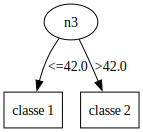

In [16]:
# Exemple d'utilisation: 
un_arbre = NoeudNumerique(nom='n1')
un_arbre.ajoute_feuille("classe 1")
un_arbre.est_feuille()
un_arbre1 = NoeudNumerique(nom="n2")
un_arbre1.ajoute_feuille("classe 2")
un_arbre2 = NoeudNumerique(nom="n3")
un_arbre2.ajoute_fils(42.0,un_arbre,un_arbre1)
print("Cet arbre contient ", un_arbre2.compte_feuilles()," feuilles.")

gtree = gv.Digraph(format='png')
un_arbre2.to_graph(gtree)



<font color="RED" size="+1"><b>[Q]</b></font> En utilisant la fonction `discretise`, compléter la fonction `construit_AD_num` (ça ressemble à la version catégorielle réalisée lors de la séance précédente) afin de pouvoir construire des arbres de décision avec des valeurs numériques.
Les attributs numériques seront discrétisés en 2 valeurs catégorielles.

In [17]:
def construit_AD_num(X,Y,epsilon,LNoms = []):
    """ X,Y : dataset
        epsilon : seuil d'entropie pour le critère d'arrêt 
        LNoms : liste des noms de features (colonnes) de description 
    """
    
    # dimensions de X:
    (nb_lig, nb_col) = X.shape
    
    entropie_classe = classif.entropie(Y)
    
    if (entropie_classe <= epsilon) or  (nb_lig <=1):
        # ARRET : on crée une feuille
        noeud = NoeudNumerique(-1,"Label")
        noeud.ajoute_feuille(classif.classe_majoritaire(Y))
    else:
        gain_max = 0.0  # meilleur gain trouvé (initalisé à 0.0 => aucun gain)
        i_best = -1     # numéro du meilleur attribut (init à -1 (aucun))
        
        #############
        
        # COMPLETER CETTE PARTIE : ELLE DOIT PERMETTRE D'OBTENIR DANS
        # i_best : le numéro de l'attribut qui maximise le gain d'information.  En cas d'égalité,
        #          le premier rencontré est choisi.
        # gain_max : la plus grande valeur de gain d'information trouvée.
        # Xbest_tuple : le tuple rendu par partionne() pour le meilleur attribut trouvé
        # Xbest_seuil : le seuil de partitionnement associé au meilleur attribut
        #
        # Remarque : attention, la fonction discretise() peut renvoyer un tuple contenant
        # None (pas de partitionnement possible)n dans ce cas, on considèrera que le
        # résultat d'un partitionnement est alors ((X,Y),(None,None))
        
        Xbest_tuple = None
        Xbest_seuil = None
        
        for num_col in range(nb_col):
            (seuil, entropie), _ = discretise(X, Y, num_col)
            if seuil is None:
                continue
            gain = entropie_classe - entropie
            if gain > gain_max:
                gain_max = gain
                i_best = num_col
                Xbest_seuil = seuil
                Xbest_tuple = partitionne(X, Y, num_col, seuil)
        
        ############
        if (i_best != -1): # Un attribut qui amène un gain d'information >0 a été trouvé
            if len(LNoms)>0:  # si on a des noms de features
                noeud = NoeudNumerique(i_best,LNoms[i_best]) 
            else:
                noeud = NoeudNumerique(i_best)
            ((left_data,left_class), (right_data,right_class)) = Xbest_tuple
            noeud.ajoute_fils( Xbest_seuil, \
                              construit_AD_num(left_data,left_class, epsilon, LNoms), \
                              construit_AD_num(right_data,right_class, epsilon, LNoms) )
        else: # aucun attribut n'a pu améliorer le gain d'information
              # ARRET : on crée une feuille
            noeud = NoeudNumerique(-1,"Label")
            noeud.ajoute_feuille(classif.classe_majoritaire(Y))
        
    return noeud

In [18]:
class ClassifierArbreNumerique(classif.Classifier):
    """ Classe pour représenter un classifieur par arbre de décision numérique
    """
    
    def __init__(self, input_dimension, epsilon, LNoms=[]):
        """ Constructeur
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
                - epsilon (float) : paramètre de l'algorithme (cf. explications précédentes)
                - LNoms : Liste des noms de dimensions (si connues)
            Hypothèse : input_dimension > 0
        """
        self.dimension = input_dimension
        self.epsilon = epsilon
        self.LNoms = LNoms
        # l'arbre est manipulé par sa racine qui sera un Noeud
        self.racine = None
        
    def toString(self):
        """  -> str
            rend le nom du classifieur avec ses paramètres
        """
        return 'ClassifierArbreDecision ['+str(self.dimension) + '] eps='+str(self.epsilon)
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        self.racine = construit_AD_num(desc_set,label_set,self.epsilon,self.LNoms)
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        # cette méthode ne fait rien dans notre implémentation :
        pass
    
    def predict(self, x):
        """ x (array): une description d'exemple
            rend la prediction sur x             
        """
        return self.racine.classifie(x)

    def accuracy(self, desc_set, label_set):  # Version propre à aux arbres
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        nb_ok=0
        for i in range(desc_set.shape[0]):
            if self.predict(desc_set[i,:]) == label_set[i]:
                nb_ok=nb_ok+1
        acc=nb_ok/(desc_set.shape[0] * 1.0)
        return acc

    def number_leaves(self):
        """ rend le nombre de feuilles de l'arbre
        """
        return self.racine.compte_feuilles()
    
    def affiche(self,GTree):
        """ affichage de l'arbre sous forme graphique
            Cette fonction modifie GTree par effet de bord
        """
        self.racine.to_graph(GTree)
# ---------------------------


Cet arbre possède  11  feuilles.


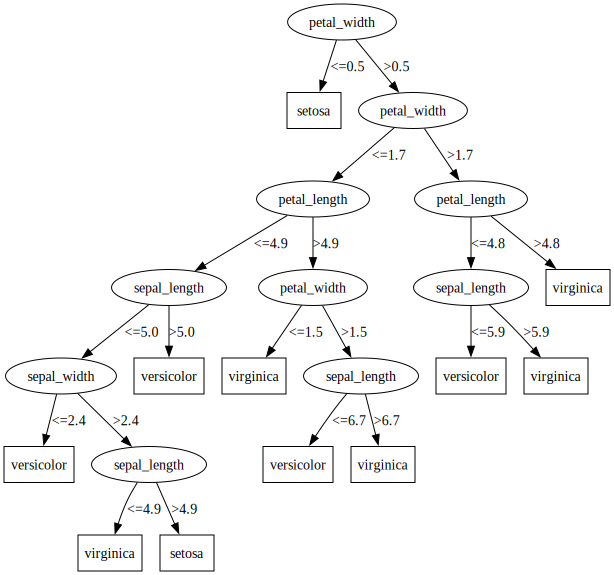

In [19]:
# Initialiation d'un arbre pour le dataset Iris:
arbre_iris = ClassifierArbreNumerique(len(iris_noms), 0.0, iris_noms)

# Construction de l'arbre de décision à partir du dataset Iris
arbre_iris.train(iris_desc,iris_label)

# Construction de la représentation graphique (affichage)
graphe_arbre_iris = gv.Digraph(format='png')
arbre_iris.affiche(graphe_arbre_iris)

# Affichage du graphe obtenu:
print("Cet arbre possède ",arbre_iris.number_leaves()," feuilles.")
graphe_arbre_iris    # ---> Cet arbre possède 11 feuilles...

In [20]:
# mesure du taux de bonne classification
arbre_iris.accuracy(iris_desc,iris_label)

1.0

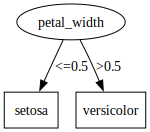

In [21]:
# Nouvel essai avec un seuil d'entropie élevé:
# Initialiation d'un arbre pour le dataset Elections:
arbre_iris2 = ClassifierArbreNumerique(len(iris_noms),0.75, iris_noms)

# Construction de l'arbre de décision à partir du dataset Elections
arbre_iris2.train(iris_desc,iris_label)

# Construction de la représentation graphique (affichage)
graphe_arbre_iris2 = gv.Digraph(format='png')
arbre_iris2.affiche(graphe_arbre_iris2)

# Affichage du graphe obtenu:
graphe_arbre_iris2

In [22]:
# mesure du taux de bonne classification
arbre_iris2.accuracy(iris_desc,iris_label)

0.66

### Expérimentations

<font color="RED" size="+1"><b>[Q]</b></font> Tester cet algorithme en effectuant une validation croisée sur les données des iris (en prenant $0.0$ comme seuil d'entropie).

In [23]:
# Chargement du dataset des iris avec sklearn
DS = (iris_desc, iris_label)

print("Remarque: j'ai mis des affichages dans la fonction validation croisée afin de montrer ce qui se passe.\n")

# Démarrage du chronomètre
tic = time.time()

# Instanciation du classifieur avec un seuil d'entropie de 0.0
classifieur = ClassifierArbreNumerique(input_dimension=iris_desc.shape[1], epsilon=0.0)

# Exécution de la validation croisée
res_all, res_moy, res_sd = ev.validation_croisee(classifieur, DS, 10)

# Fin du chronomètre
toc = time.time()

# Affichage des résultats
print("\nValidation croisée sur les iris avec comme seuil ", 0.0)
print("Perf obtenues : ", res_all)
print(f'\nAccuracy moyenne: {res_moy:.3f}\técart type: {res_sd:.3f}')
print(f'Temps mis: {(toc-tic):.3f}s')

Remarque: j'ai mis des affichages dans la fonction validation croisée afin de montrer ce qui se passe.

------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 135	taille base test=15	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.9333
Itération 2: taille base app.= 135	taille base test=15	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.9333
Itération 4: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.8667
Itération 5: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.8667
Itération 6: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.9333
Itération 7: taille base app.= 135	taille base test=15	Taux de bonne classif: 1.0000
Itération 8: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.9333
Itération 9: taille base app.= 135	taille base test=15	Taux de bonne classif: 1.000

<font color="RED" size="+1"><b>[Q]</b></font> Etudier la variation du taux de bonne classification lorsque l'on fait varier le seuil d'entropie utilisé pour l'apprentissage. Tracer ensuite la courbe de l'accuracy moyenne (incluant son écart type) quand le seuil d'entropie varie.

------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 135	taille base test=15	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.9333
Itération 2: taille base app.= 135	taille base test=15	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.9333
Itération 4: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.8667
Itération 5: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.8667
Itération 6: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.9333
Itération 7: taille base app.= 135	taille base test=15	Taux de bonne classif: 1.0000
Itération 8: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.9333
Itération 9: taille base app.= 135	taille base test=15	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
run  0: seuil d'entropie = 0.000 	 accuracy moyenne: 0.947 	 é

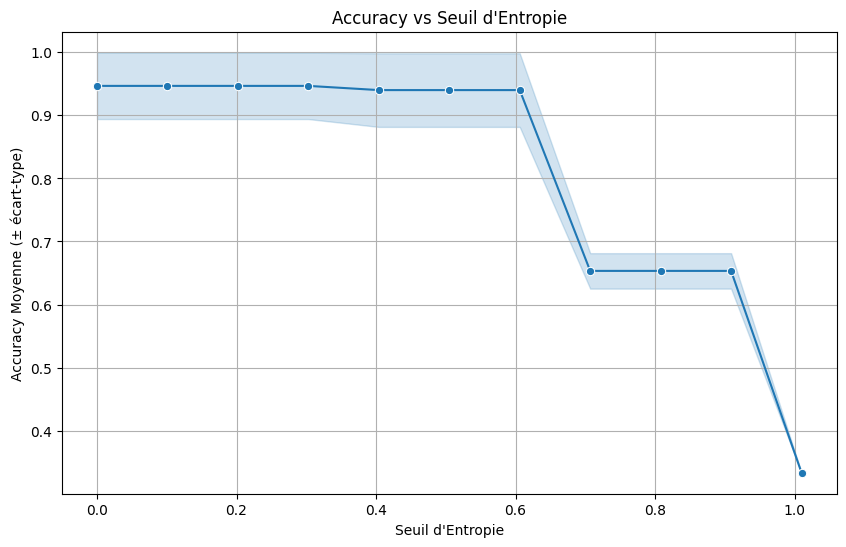

In [24]:
entropy_thresholds = np.linspace(0, 1.01, 11)

# Initialize an empty list to store results
results = []

for idx, seuil in enumerate(entropy_thresholds):
    tic = time.time()
    
    arbre = ClassifierArbreNumerique(len(iris_noms), seuil, iris_noms)
    res_cv = ev.validation_croisee(arbre, (iris_desc, iris_label), 10)
    
    # Store results in the list
    for acc in res_cv[0]:  # res_cv[0] contains the list of accuracies
        results.append({'Entropie': seuil, 'Accuracy': acc})
    
    toc = time.time()
    print(f"run {idx:2d}: seuil d'entropie = {seuil:.3f} \t "
          f"accuracy moyenne: {np.mean(res_cv[0]):.3f} \t "
          f"écart type: {np.std(res_cv[0]):.3f}\t "
          f"(temps: {toc-tic:.3f}s)")

# Convert the list to a DataFrame
df_res = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Entropie', y='Accuracy', data=df_res, errorbar='sd', marker='o')
plt.title('Accuracy vs Seuil d\'Entropie')
plt.xlabel('Seuil d\'Entropie')
plt.ylabel('Accuracy Moyenne (± écart-type)')
plt.grid(True)
plt.show()

Pour pouvoir afficher la courbe des variations de l'accuracy en affichant aussi l'écart type correspondant à chaque valeur, on utilise la fonction `lineplot` de seaborn, pour cela, il est nécessaire dans un premier temps de mettre les résultats obtenus dans un dataframe :
- avec 2 colonnes: 'Entropie' et 'Accuracy'
- chaque ligne donne le résultat d'un taux de bonne classification obtenu dans la validation croisée pour une valeur de seuil d'entropie : il y a donc 10 lignes par seuil d'entropie, chaque ligne avec le résultat d'une étape de la validation croisée.

<font color="RED" size="+1"><b>[Q]</b></font> Construire le dataframe ainsi défini.

In [25]:
df_res = pd.DataFrame(columns=['Entropie', 'Accuracy'])

# ################### A COMPLETER 

# Liste des seuils d'entropie à tester
entropy_thresholds = np.linspace(0, 1.01, 11)

# Pour chaque seuil d'entropie
for seuil in entropy_thresholds:
    # Création de l'arbre avec le seuil courant
    arbre = ClassifierArbreNumerique(len(iris_noms), seuil, iris_noms)
    
    # Validation croisée (10 itérations)
    res_cv = ev.validation_croisee(arbre, (iris_desc, iris_label), 10)
    
    # res_cv[0] contient la liste des 10 taux de bonne classification
    for acc in res_cv[0]:
        # Ajout d'une nouvelle ligne au dataframe
        new_row = pd.DataFrame({'Entropie': [seuil], 'Accuracy': [acc]})
        df_res = pd.concat([df_res, new_row], ignore_index=True)

# ################### 
# Le datataframe obtenu :
df_res

------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 135	taille base test=15	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.9333
Itération 2: taille base app.= 135	taille base test=15	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.9333
Itération 4: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.8667
Itération 5: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.8667
Itération 6: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.9333
Itération 7: taille base app.= 135	taille base test=15	Taux de bonne classif: 1.0000
Itération 8: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.9333
Itération 9: taille base app.= 135	taille base test=15	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
------ affichage validation croisée (optionnel)
Itération 0: t

/var/folders/x0/9jmwqqtj7s13pdfprxbhp6r00000gn/T/ipykernel_5574/1576233721.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_res = pd.concat([df_res, new_row], ignore_index=True)


Itération 4: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.8667
Itération 5: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.8667
Itération 6: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.9333
Itération 7: taille base app.= 135	taille base test=15	Taux de bonne classif: 1.0000
Itération 8: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.9333
Itération 9: taille base app.= 135	taille base test=15	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 135	taille base test=15	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.9333
Itération 2: taille base app.= 135	taille base test=15	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 135	taille base test=15	Taux de bonne classif: 0.9333
Itération 4: taille base app.= 135	taille base test=15	Taux de

,Entropie,Accuracy
0,0.00,1.000000
1,0.00,0.933333
2,0.00,1.000000
3,0.00,0.933333
4,0.00,0.866667
...,...,...
105,1.01,0.333333
106,1.01,0.333333
107,1.01,0.333333
108,1.01,0.333333


L'affichage se fait avec la fonction `lineplot` de seaborn. 

**Remarque**: le calcul de la moyenne et de l'écart type pour une même valeur de seuil est géré par la fonction.

<Axes: xlabel='Entropie', ylabel='Accuracy'>

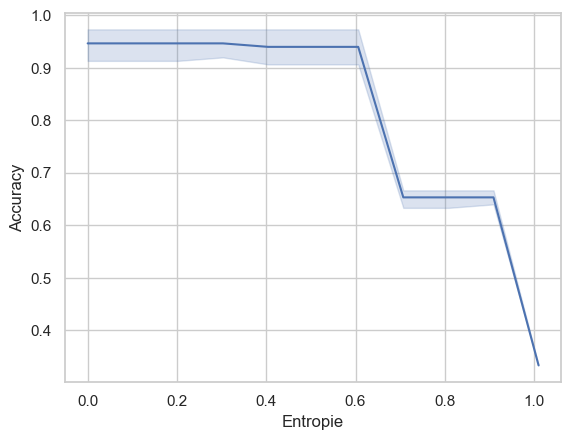

In [26]:
# Tracé avec lineplot de seaborn:
sns.set_theme(style="whitegrid")
sns.lineplot(x="Entropie", y="Accuracy", data=df_res)

<font color="RED" size="+1"><b>[Q]</b></font> Comparer les résultats obtenus avec la validation croisée avec les résultats obtenus avec les autres classifieurs (numériques) que vous avez implémentés.

<b>Remarque:</b> pour pouvoir utiliser les algorithmes précédents (knn, perceptron,...) vous devez utiliser leur version multi-classes.

### Pour aller plus loin... (optionnel)

La version générale d'un classifieur par arbre de décision doit pouvoir gérer des datasets contenant à la fois des variables numériques mais aussi catégorielles. En "fusionnant" les 2 classes `ClassifierArbreDecision` et `ClassifierArbreNumerique`, définissez une classe `ClassifierArbre` qui implémente cette version générale.

In [27]:
class ClassifierArbre(classif.Classifier):
    """ Classe pour représenter un classifieur par arbre de décision généralisé
        qui gère à la fois les variables numériques et catégorielles.
    """

    def __init__(self, input_dimension, epsilon, LNoms=[]):
        """ Constructeur
            Argument:
                - input_dimension (int) : dimension de la description des exemples
                - epsilon (float) : paramètre de l'algorithme (seuil d'entropie pour le critère d'arrêt)
                - LNoms : Liste des noms de dimensions (si connues)
            Hypothèse : input_dimension > 0
        """
        super().__init__(input_dimension)
        self.epsilon = epsilon
        self.LNoms = LNoms
        self.racine = None

    def toString(self):
        """ Rend le nom du classifieur avec ses paramètres """
        return f'ClassifierArbre [{self.dimension}] eps={self.epsilon}'

    def train(self, desc_set, label_set):
        """ Permet d'entraîner le modèle sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        self.racine = self.construit_AD(desc_set, label_set, self.epsilon, self.LNoms)

    def score(self, x):
        """ Rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        pass

    def predict(self, x):
        """ x (array): une description d'exemple
            Rend la prédiction sur x
        """
        if self.racine is None:
            raise ValueError("L'arbre n'a pas été entraîné")
        return self.racine.classifie(x)

    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        nb_ok = 0
        for i in range(desc_set.shape[0]):
            if self.predict(desc_set[i, :]) == label_set[i]:
                nb_ok += 1
        acc = nb_ok / (desc_set.shape[0] * 1.0)
        return acc

    def number_leaves(self):
        """ Rend le nombre de feuilles de l'arbre """
        return self.racine.compte_feuilles()

    def affiche(self, GTree):
        """ Affichage de l'arbre sous forme graphique
            Cette fonction modifie GTree par effet de bord
        """
        if self.racine:
            self.racine.to_graph(GTree)

    def construit_AD(self, X, Y, epsilon, LNoms=[]):
        """ Construit l'arbre de décision en fonction du type des attributs
            X, Y : dataset
            epsilon : seuil d'entropie pour le critère d'arrêt
            LNoms : liste des noms de features (colonnes) de description
        """
        entropie_classe = classif.entropie(Y)
        if entropie_classe <= epsilon or len(Y) <= 1:
            # ARRET : on crée une feuille
            noeud = classif.NoeudCategoriel(-1, "Label")
            noeud.ajoute_feuille(classif.classe_majoritaire(Y))
            return noeud

        # Initialisation pour trouver le meilleur attribut
        min_entropie = float('inf')
        i_best = -1
        Xbest_valeurs = None
        Xbest_seuil = None

        # Parcours de tous les attributs
        for i in range(X.shape[1]):
            if np.issubdtype(X[:, i].dtype, np.number):
                # Attribut numérique
                (seuil, entropie_cond), _ = discretise(X, Y, i)
                if seuil is None:
                    continue
                if entropie_cond < min_entropie:
                    min_entropie = entropie_cond
                    i_best = i
                    Xbest_seuil = seuil
            else:
                # Attribut catégoriel
                valeurs = np.unique(X[:, i])
                entropie_cond = 0.0
                for v in valeurs:
                    Y_v = Y[X[:, i] == v]
                    if len(Y_v) > 0:
                        p = len(Y_v) / len(Y)
                        entropie_cond += p * classif.entropie(Y_v)
                if entropie_cond < min_entropie:
                    min_entropie = entropie_cond
                    i_best = i
                    Xbest_valeurs = valeurs

        # Si aucun attribut n'apporte un gain d'information
        if i_best == -1:
            noeud = classif.NoeudCategoriel(-1, "Label")
            noeud.ajoute_feuille(classif.classe_majoritaire(Y))
            return noeud

        # Création du noeud avec le meilleur attribut
        nom_attribut = LNoms[i_best] if LNoms else ''
        if Xbest_seuil is not None:
            # Attribut numérique
            noeud = NoeudNumerique(i_best, nom_attribut)
            (left_data, left_class), (right_data, right_class) = partitionne(X, Y, i_best, Xbest_seuil)
            noeud.ajoute_fils(Xbest_seuil, self.construit_AD(left_data, left_class, epsilon, LNoms),
                              self.construit_AD(right_data, right_class, epsilon, LNoms))
        else:
            # Attribut catégoriel
            noeud = classif.NoeudCategoriel(i_best, nom_attribut)
            for v in Xbest_valeurs:
                X_v = X[X[:, i_best] == v, :]
                Y_v = Y[X[:, i_best] == v]
                if len(Y_v) > 0:
                    noeud.ajoute_fils(v, self.construit_AD(X_v, Y_v, epsilon, LNoms))

        return noeud

# Apprentissage non supervisé : la classification hiérarchique ascendante

Dans cette partie, le travail à réaliser décompose en 2 phases :
- dans la phase 1, le travail porte sur la base d'apprentissage <code>base-2D.csv</code> qui contient des exemples décrits dans $R^2$. Ainsi, il est plus aisé de visualiser les résultats des fonctions à écrire ;
- dans la phase 2, les fonctions écrites dans la phase précédente sont à utiliser avec la base d'apprentissage `base-Paris.csv`.

**Attention**: vos fonctions doivent **dès leur création** pouvoir s'appliquer **quelle que soit la dimension** des exemples traités.

**Remarque**: pour écrire les fonctions demandées, il est important d'éviter d'utiliser des boucles autant que possible.

### Phase 1: implémentation des fonctions et travail sur base_2D.csv

#### Chargement du fichier "base_2D.csv"

Charger le fichier `base_2D.csv` et, par exemple avec la fonction `read_csv` de pandas. Le résultat est stocké sous la forme d'un dataframe.

In [28]:
data_2D = pd.read_csv("./data/base-2D.csv")


print("Il y a", len(data_2D), "exemples dans la base.")

Il y a 14 exemples dans la base.


In [29]:
# Le dataframe correspondant:
data_2D

,X1,X2
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0
5,4.0,4.0
6,4.0,5.0
7,4.0,6.0
8,4.5,1.0
9,4.5,6.0


<font size="+1" color="RED">**[Q]**</font> Afficher la base sous forme graphique.


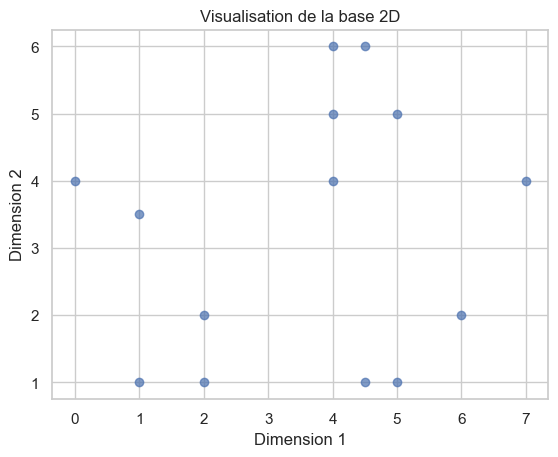

In [30]:
# Affichage graphique
plt.scatter(data_2D.iloc[:, 0], data_2D.iloc[:, 1], alpha=0.7)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Visualisation de la base 2D")
plt.grid(True)
plt.show()

#### Normalisation des données

<font size="+1" color="RED"><b>[Q]</b></font> Donner les instructions permettant d'afficher les valeurs minimales et maximales de chaque colonne du dataframe `base_2D`.

Remarque : soyez général ! Il faut que ces instructions restent valables quel que soit le dataframe donné (noms et nombre de colonnes non connus au départ par exemple).


In [31]:
# Affichage des valeurs minimales et maximales avec un format spécifique
print("Minimum et maximum de chaque colonne:")
for col in data_2D.columns:
    print(f"colonne {col} : {data_2D[col].min()} {data_2D[col].max()}")

Minimum et maximum de chaque colonne:
colonne X1 : 0.0 7.0
colonne X2 : 1.0 6.0


<font size="+1" color="RED"><b>[Q]</b></font> En utilisant le minimum et le maximum de chaque variable, et en se référant à la méthode de normalisation présentée au cours 8, écrire la fonction <code>normalisation</code> qui prend en argument un <code>DataFrame</code> et rend le dataframe obtenu en normalisant chaque colonne de ce <code>DataFrame</code> (ie. les valeurs de la matrice résultat doivent être dans l'intervalle $[0,1])$.


In [32]:
def normalisation(df):
    """ Normalise un DataFrame pour que chaque colonne soit entre 0 et 1 """
    return (df - df.min()) / (df.max() - df.min())

<font size="+1" color="RED"><b>[Q]</b></font> Normaliser les données de la base-2D et afficher leur représentation graphique: vérifier que le tracé est le même que celui obtenu avant la normalisation (aux valeurs des axes près).

In [33]:
# Normalisation des données
data_2D_norm = normalisation(data_2D)

# Récupération des valeurs normalisées
X1_values = data_2D_norm.iloc[:, 0]
X2_values = data_2D_norm.iloc[:, 1]

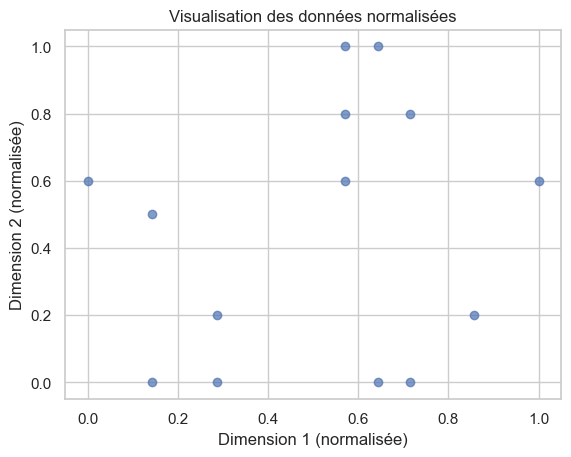

In [34]:
# le résultat du plot est identique au précédent, aux valeurs des axes près.
plt.scatter(X1_values, X2_values, alpha=0.7)
plt.xlabel("Dimension 1 (normalisée)")
plt.ylabel("Dimension 2 (normalisée)")
plt.title("Visualisation des données normalisées")
plt.grid(True)
plt.show()


#### Distances entre exemples

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>dist_euclidienne</code> qui prend en argument deux exemples sous la forme de vecteurs (Dataframe ou np.array) et rend leur distance euclidienne. 

In [35]:
def dist_euclidienne(v1, v2):
    """ Calcule la distance euclidienne entre deux vecteurs v1 et v2 """
    return np.sqrt(np.sum((v1 - v2) ** 2))

In [36]:
v1= data_2D_norm.iloc[0]
v2= data_2D_norm.iloc[1]
print("v1 : ",v1, "\nv2 : ",v2)
print("distance euclidienne entre v1 et v2 : ", dist_euclidienne(v1,v2))

v1 :  X1    0.0
X2    0.6
Name: 0, dtype: float64 
v2 :  X1    0.142857
X2    0.500000
Name: 1, dtype: float64
distance euclidienne entre v1 et v2 :  0.17437936593905287


In [37]:
# Remarque : si elle est bien écrite, la fonction doit fonctionner aussi pour un np.array:

v1= np.array(data_2D_norm.iloc[0])
v2= np.array(data_2D_norm.iloc[1])
print("v1 : ",v1, "\nv2 : ",v2)
print("distance euclidienne entre v1 et v2 : ", dist_euclidienne(v1,v2))

v1 :  [0.  0.6] 
v2 :  [0.14285714 0.5       ]
distance euclidienne entre v1 et v2 :  0.17437936593905287


In [38]:
# autre exemples:
v3= np.array([0,0,0])
v4= np.array([1,1,1])
print("v3 : ",v3, "\nv4 : ",v4)
print("distance euclidienne entre v3 et v4 : ", dist_euclidienne(v3,v4))
v5= np.array([0,0,0])
v6= np.array([-1,0,1])
print("v5 : ",v5, "\nv6 : ",v6)
print("distance euclidienne entre v5 et v6 : ", dist_euclidienne(v5,v6))

v3 :  [0 0 0] 
v4 :  [1 1 1]
distance euclidienne entre v3 et v4 :  1.7320508075688772
v5 :  [0 0 0] 
v6 :  [-1  0  1]
distance euclidienne entre v5 et v6 :  1.4142135623730951


#### Calcul de centroides

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>centroide</code> qui, étant donné un dataframe (ou un np.array) contenant plusieurs exemples rend leur centre de gravité (centroide).
On fait l'hypothèse qu'il y a toujours au moins un exemple.


In [39]:
def centroide(data):
    """ 
    Calcule le centroïde d'un ensemble d'exemples.
    
    Paramètres:
        - data : DataFrame ou np.array contenant plusieurs exemples
    
    Retourne:
        - Un vecteur représentant le centroïde
    """
    return data.mean(axis=0)

In [40]:
centroide(data_2D_norm)

X1    0.510204
X2    0.450000
dtype: float64

In [41]:
# Remarque : si elle est bien écrite, la fonction doit fonctionner aussi pour un np.array:
centroide( np.array(data_2D_norm) )

array([0.51020408, 0.45      ])

#### Distances entre groupes d'exemples (approche centroides)


La distance entre deux groupes d'exemples correspond à la distance entre leurs centroïdes (approche "centroid linkage"). Pour cette approche, on prendra seulement la distance euclidienne.

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>dist_centroides</code> qui prend en argument deux groupes de vecteurs (dataframe ou np.array) et qui rend leur distance euclidienne.


In [42]:
def dist_centroides(group1, group2):
    """ 
    Calcule la distance entre deux groupes d'exemples en utilisant leurs centroïdes.
    
    Paramètres:
        - group1, group2 : DataFrame ou np.array contenant les exemples
    
    Retourne:
        - La distance euclidienne entre les centroïdes des deux groupes (float)
    """
    centroid1 = centroide(group1)
    centroid2 = centroide(group2)
    return dist_euclidienne(centroid1, centroid2)

In [43]:
# Par exemple:
dist_centroides(data_2D_norm.iloc[0:4],data_2D_norm.iloc[5:13])

np.float64(0.586345478713841)

####  l'algorithme de classification hiérarchique

Dans la suite de cet exercice, une partition (qui est un groupe de clusters) est représentée par une structure de données de type dictionnaire (c'est à dire <code>dict()</code>) :
- la clé est un numéro de cluster (sous la forme d'un entier naturel) ;
- la valeur associée est un liste contenant les indices des exemples qui sont dans le cluster correspondant.

Les indices sont ceux du dataframe qui contient la base initiale.

<b>Dans ce qui suit, on appelle "partition" un tel dictionnaire.</b>


Rappel: `iloc` accepte une liste d'indices pour extraire des lignes d'un dataframe...

In [44]:
data_2D_norm.iloc[[0,3,1]]

,X1,X2
0,0.000000,0.6
3,0.285714,0.0
1,0.142857,0.5


<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>initialise_CHA</code> qui, étant donné un dataframe DF représentant une base d'apprentissage, rend une partition contenant autant d'entrées que d'exemples dans DF. La clé de chaque entrée sera le numéro de l'exemple. Cette fonction sera spécifique au clustering hiérarchique ascendant (CHA).

In [45]:
def initialise_CHA(DF):
    """
    Initialise la partition pour le clustering hiérarchique ascendant (CHA).
    
    Paramètres:
        - DF : DataFrame représentant la base d'apprentissage.
    
    Retourne:
        - Un dictionnaire où chaque clé est un numéro d'exemple, et la valeur est une liste contenant uniquement ce numéro.
    """
    return {i: [i] for i in range(len(DF))}


In [46]:
# Par exemple:
depart = initialise_CHA(data_2D_norm)
depart

{0: [0],
 1: [1],
 2: [2],
 3: [3],
 4: [4],
 5: [5],
 6: [6],
 7: [7],
 8: [8],
 9: [9],
 10: [10],
 11: [11],
 12: [12],
 13: [13]}

#### Variante 1: chaînage par centroides

On souhaite implémenter ici l'algorithme de classification hiérarchique basé sur l'approche "centroid linkage".

On commence par implémenter une fonction qui, étant donné une partition, permet de regrouper les 2 clusters les plus proches. Ces 2 clusters sont alors fusionnés pour n'en former qu'un seul qui est ajouté à la partition, alors que les 2 clusters initiaux sont retirés de la partition.

On fait l'hypothèse que la partition initiale contient au moins 2 groupes.

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>fusionne</code> qui prend en argument un dataframe contenant des exemples et une partition P0 et qui rend le tuple composé des 4 valeurs suivantes:
- la partition P1 obtenue après fusion des 2 clusters de P0 les plus proches ;
- les clés des 2 clusters de P0 qui ont été fusionnés et qui ne sont donc plus dans P1 ;
- la distance qui séparait ces 2 clusters, calculée selon le nom de distance donné.

Vous rajouterez un troisième argument (avec valeur par défaut) à la fonction : `verbose=False` qui indique si des messages doivent être affichés pour expliquer ce que fait la fonctionne. Les messages doivent tous commencer par "fusionne:".

In [47]:
import itertools

def fusionne(df, P0, verbose=False):
    """
    Fusionne les 2 clusters les plus proches dans une partition selon la distance des centroïdes.

    Arguments :
    - df : DataFrame contenant les données normalisées.
    - P0 : Dictionnaire représentant la partition actuelle {clé: liste d'indices}.
    - verbose : Booléen, affiche des messages si True.

    Retourne :
    - P1 : Nouvelle partition après fusion.
    - c1, c2 : Les clés des clusters fusionnés.
    - d_min : La distance entre les deux clusters fusionnés.
    """
    # Liste des clés des clusters
    clusters = list(P0.keys())
    
    # Variables pour suivre les clusters à fusionner
    c1, c2 = None, None
    d_min = float("inf")
    
    # Recherche des 2 clusters les plus proches
    for i, j in itertools.combinations(clusters, 2):  # Toutes les paires possibles
        # Récupération des centroïdes
        centroide_i = centroide(df.iloc[P0[i]])
        centroide_j = centroide(df.iloc[P0[j]])
        
        # Calcul de la distance entre les centroïdes
        d = dist_euclidienne(centroide_i, centroide_j)
        
        # Mise à jour si une distance plus petite est trouvée
        if d < d_min:
            d_min = d
            c1, c2 = i, j

    # Affichage du premier message verbose
    if verbose:
        print(f"fusionne: distance minimale trouvée entre  [{c1}, {c2}]  =  {d_min:.16f}")

    # Fusion des deux clusters trouvés
    new_cluster = P0[c1] + P0[c2]  # Union des indices

    # Création de la nouvelle partition
    P1 = {k: v for k, v in P0.items() if k not in (c1, c2)}  # Suppression de c1 et c2
    new_key = max(P0.keys()) + 1  # Nouvelle clé pour le cluster fusionné
    P1[new_key] = new_cluster

    # Affichage des autres messages verbose
    if verbose:
        print(f"fusionne: les 2 clusters dont les clés sont  [{c1}, {c2}]  sont fusionnés")
        print(f"fusionne: on crée la nouvelle clé {new_key} dans le dictionnaire.")
        print(f"fusionne: les clés de  [{c1}, {c2}]  sont supprimées car leurs clusters ont été fusionnés.")

    return P1, c1, c2, d_min


In [48]:
# Exemple:
fusionne(data_2D_norm, depart)

({0: [0],
  1: [1],
  2: [2],
  3: [3],
  4: [4],
  5: [5],
  6: [6],
  7: [7],
  9: [9],
  11: [11],
  12: [12],
  13: [13],
  14: [8, 10]},
 8,
 10,
 np.float64(0.0714285714285714))

In [49]:
# Exemple avec verbose:
fusionne(data_2D_norm, depart,verbose=True)

fusionne: distance minimale trouvée entre  [8, 10]  =  0.0714285714285714
fusionne: les 2 clusters dont les clés sont  [8, 10]  sont fusionnés
fusionne: on crée la nouvelle clé 14 dans le dictionnaire.
fusionne: les clés de  [8, 10]  sont supprimées car leurs clusters ont été fusionnés.


({0: [0],
  1: [1],
  2: [2],
  3: [3],
  4: [4],
  5: [5],
  6: [6],
  7: [7],
  9: [9],
  11: [11],
  12: [12],
  13: [13],
  14: [8, 10]},
 8,
 10,
 np.float64(0.0714285714285714))

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>CHA_centroid</code> qui prend en argument un dataframe et rend une liste composée de listes contenant chacune:
- les 2 indices d'éléments fusionnés
- la distance les séparant
- la somme du nombre d'éléments des 2 éléments fusionnés

Comme pour la fonction précédente, vous rajouterez un argument `verbose=False` pour gérer l'affichage de messages lors de l'exécution de la fonction (et de la fonction précédente qu'elle appelle). Les messages de cette fonction commencent par "CHA_centroid:".

Remarque: chaque sous-liste contient donc les 3 dernières valeurs du résultats de `fusionne()`.


In [50]:
def CHA_centroid(df, verbose=False):
    """
    Effectue le clustering hiérarchique ascendant (CHA) en utilisant la distance des centroïdes.

    Paramètres:
        - df : DataFrame contenant les données normalisées.
        - verbose : Booléen, affiche des messages si True.

    Retourne:
        - Une liste composée de listes contenant chacune :
            - Les 2 indices d'éléments fusionnés
            - La distance les séparant
            - La somme du nombre d'éléments des 2 éléments fusionnés
    """
    # Initialisation de la partition
    P = initialise_CHA(df)

    # Liste pour stocker les résultats
    fusion_results = []

    # Tant qu'il y a plus d'un cluster
    while len(P) > 1:
        # Fusion des deux clusters les plus proches
        P, c1, c2, d_min = fusionne(df, P, verbose=verbose)

        # Ajout des résultats de la fusion à la liste
        fusion_results.append([c1, c2, d_min, len(P[max(P.keys())])])

        # Affichage des messages verbose
        if verbose:
            print(f"CHA_centroid: Fusion des clusters {c1} et {c2} à une distance de {d_min:.16f}")
            print(f"CHA_centroid: Nouveau cluster contient {len(P[max(P.keys())])} éléments")

    return fusion_results


In [51]:
# L'application sur nos données:
CHA_centroid(data_2D_norm)

[[8, 10, np.float64(0.0714285714285714), 2],
 [7, 9, np.float64(0.07142857142857151), 2],
 [2, 3, np.float64(0.14285714285714285), 2],
 [6, 11, np.float64(0.1428571428571429), 2],
 [0, 1, np.float64(0.17437936593905287), 2],
 [15, 17, np.float64(0.20316375219039837), 4],
 [4, 16, np.float64(0.21237241067597867), 3],
 [12, 14, np.float64(0.26811891970176366), 3],
 [5, 19, np.float64(0.3047456282855976), 5],
 [13, 22, np.float64(0.4542857142857144), 6],
 [20, 21, np.float64(0.5000000000000001), 6],
 [18, 24, np.float64(0.638139657302555), 8],
 [23, 25, np.float64(0.6796842379114776), 14]]

In [52]:
# L'application sur nos données avec verbose à True
CHA_centroid(data_2D_norm,True)

fusionne: distance minimale trouvée entre  [8, 10]  =  0.0714285714285714
fusionne: les 2 clusters dont les clés sont  [8, 10]  sont fusionnés
fusionne: on crée la nouvelle clé 14 dans le dictionnaire.
fusionne: les clés de  [8, 10]  sont supprimées car leurs clusters ont été fusionnés.
CHA_centroid: Fusion des clusters 8 et 10 à une distance de 0.0714285714285714
CHA_centroid: Nouveau cluster contient 2 éléments
fusionne: distance minimale trouvée entre  [7, 9]  =  0.0714285714285715
fusionne: les 2 clusters dont les clés sont  [7, 9]  sont fusionnés
fusionne: on crée la nouvelle clé 15 dans le dictionnaire.
fusionne: les clés de  [7, 9]  sont supprimées car leurs clusters ont été fusionnés.
CHA_centroid: Fusion des clusters 7 et 9 à une distance de 0.0714285714285715
CHA_centroid: Nouveau cluster contient 2 éléments
fusionne: distance minimale trouvée entre  [2, 3]  =  0.1428571428571428
fusionne: les 2 clusters dont les clés sont  [2, 3]  sont fusionnés
fusionne: on crée la nouvelle

[[8, 10, np.float64(0.0714285714285714), 2],
 [7, 9, np.float64(0.07142857142857151), 2],
 [2, 3, np.float64(0.14285714285714285), 2],
 [6, 11, np.float64(0.1428571428571429), 2],
 [0, 1, np.float64(0.17437936593905287), 2],
 [15, 17, np.float64(0.20316375219039837), 4],
 [4, 16, np.float64(0.21237241067597867), 3],
 [12, 14, np.float64(0.26811891970176366), 3],
 [5, 19, np.float64(0.3047456282855976), 5],
 [13, 22, np.float64(0.4542857142857144), 6],
 [20, 21, np.float64(0.5000000000000001), 6],
 [18, 24, np.float64(0.638139657302555), 8],
 [23, 25, np.float64(0.6796842379114776), 14]]

#### Construction de dendrogramme

Le dendrogramme permet de visualiser les fusions de clusters réalisés tout au long du déroulement de l'algorithme de clustering hiérarchique.

Pour cette représentation graphique, on utilise une fonction de la librairie `scipy`.

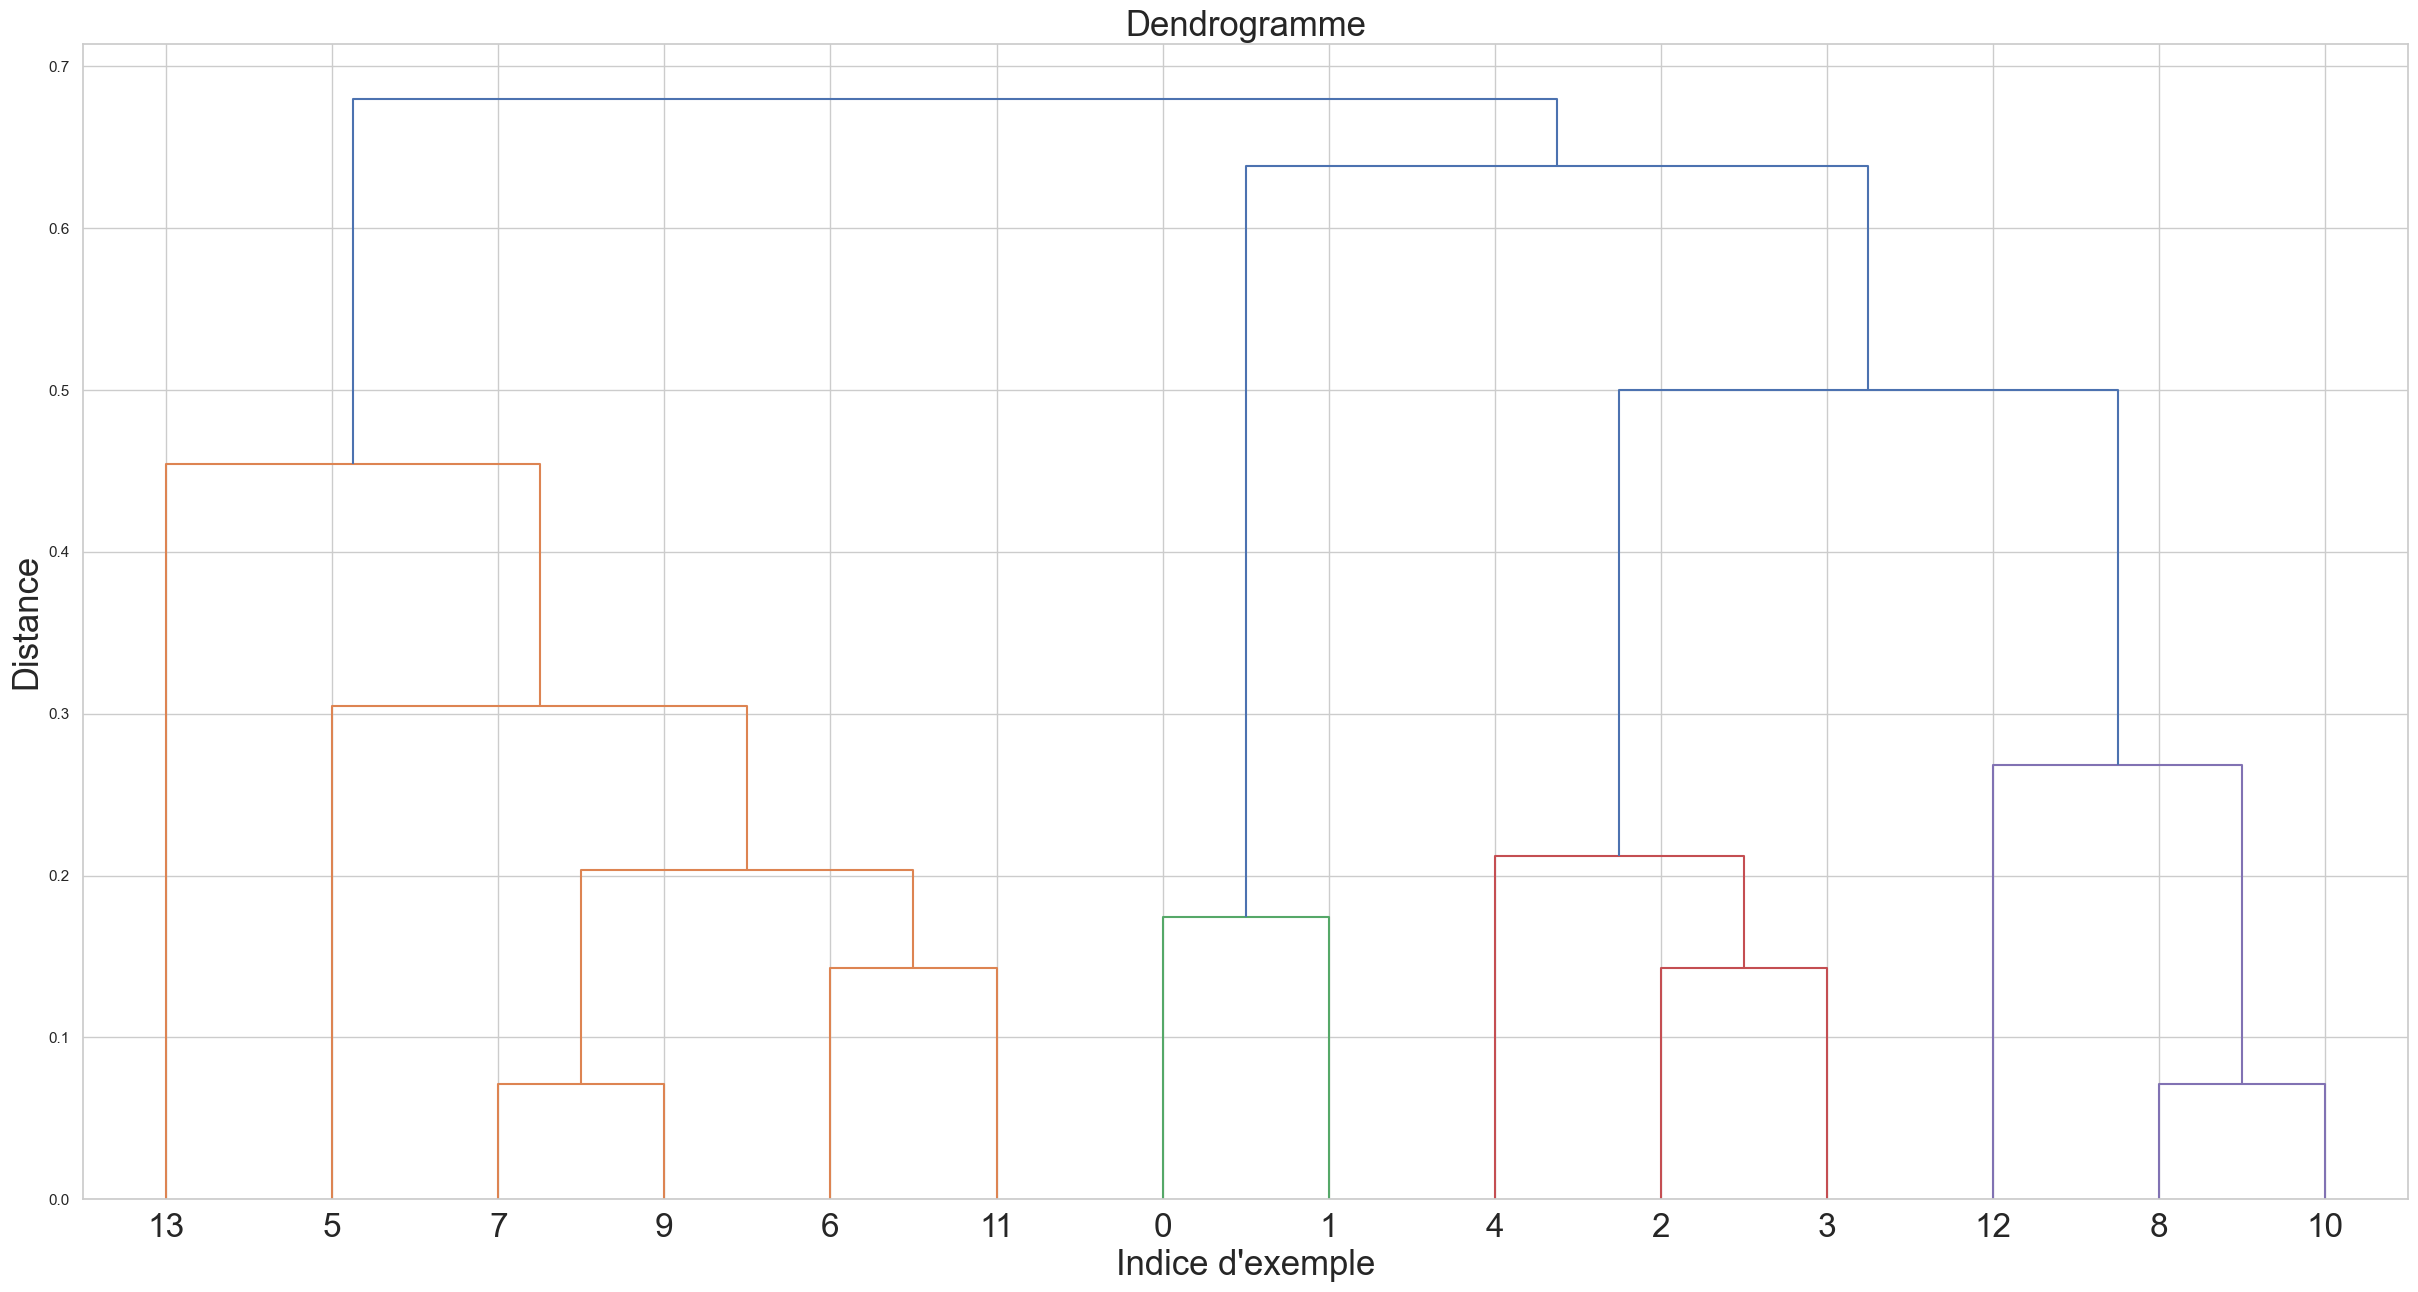

In [53]:
import scipy.cluster.hierarchy

# Paramètre de la fenêtre d'affichage: 
plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
plt.title('Dendrogramme', fontsize=25)    
plt.xlabel("Indice d'exemple", fontsize=25)
plt.ylabel('Distance', fontsize=25)

# Construction du dendrogramme pour notre clustering :
scipy.cluster.hierarchy.dendrogram(
    CHA_centroid(data_2D_norm), 
    leaf_font_size=24.,  # taille des caractères de l'axe des X
)

# Affichage du résultat obtenu:
plt.show()

<font size="+1" color="RED"><b>[Q]</b></font> Modifier la fonction <code>CHA_centroid</code> en lui rajoutant un argument supplémentaire avec valeur par défaut:
- `dendrogramme=False` pour indiquer si on souhaite ou pas l'affichage du dendrogramme résultat. Si c'est le cas, le dendrogramme sera donc afficher à l'issue de la fonction.

In [54]:
import scipy.cluster.hierarchy as sch

def CHA_centroid(df, verbose=False, dendrogramme=False):
    """
    Effectue le clustering hiérarchique ascendant (CHA) en utilisant la distance des centroïdes.

    Paramètres:
        - df : DataFrame contenant les données normalisées.
        - verbose : Booléen, affiche des messages si True.
        - dendrogramme : Booléen, affiche le dendrogramme si True.

    Retourne:
        - Une liste composée de listes contenant chacune :
            - Les 2 indices d'éléments fusionnés
            - La distance les séparant
            - La somme du nombre d'éléments des 2 éléments fusionnés
    """
    # Initialisation de la partition
    P = initialise_CHA(df)

    # Liste pour stocker les résultats
    fusion_results = []

    # Matrice de liaison pour le dendrogramme
    Z = []

    # Tant qu'il y a plus d'un cluster
    while len(P) > 1:
        # Fusion des deux clusters les plus proches
        P, c1, c2, d_min = fusionne(df, P, verbose=verbose)

        # Ajout des résultats de la fusion à la liste
        fusion_results.append([c1, c2, d_min, len(P[max(P.keys())])])

        # Ajout de l'information de fusion pour le dendrogramme
        Z.append([c1, c2, d_min, len(P[max(P.keys())])])

        # Affichage des messages verbose
        if verbose:
            print(f"CHA_centroid: Fusion des clusters {c1} et {c2} à une distance de {d_min:.16f}")
            print(f"CHA_centroid: Nouveau cluster contient {len(P[max(P.keys())])} éléments")

    # Affichage du dendrogramme si demandé
    if dendrogramme:
        plt.figure()
        sch.dendrogram(Z)
        plt.title("Dendrogramme du clustering hiérarchique")
        plt.xlabel("Indices des exemples")
        plt.ylabel("Distance entre clusters")
        plt.show()

    return fusion_results


In [55]:
CHA_centroid(data_2D_norm)

[[8, 10, np.float64(0.0714285714285714), 2],
 [7, 9, np.float64(0.07142857142857151), 2],
 [2, 3, np.float64(0.14285714285714285), 2],
 [6, 11, np.float64(0.1428571428571429), 2],
 [0, 1, np.float64(0.17437936593905287), 2],
 [15, 17, np.float64(0.20316375219039837), 4],
 [4, 16, np.float64(0.21237241067597867), 3],
 [12, 14, np.float64(0.26811891970176366), 3],
 [5, 19, np.float64(0.3047456282855976), 5],
 [13, 22, np.float64(0.4542857142857144), 6],
 [20, 21, np.float64(0.5000000000000001), 6],
 [18, 24, np.float64(0.638139657302555), 8],
 [23, 25, np.float64(0.6796842379114776), 14]]

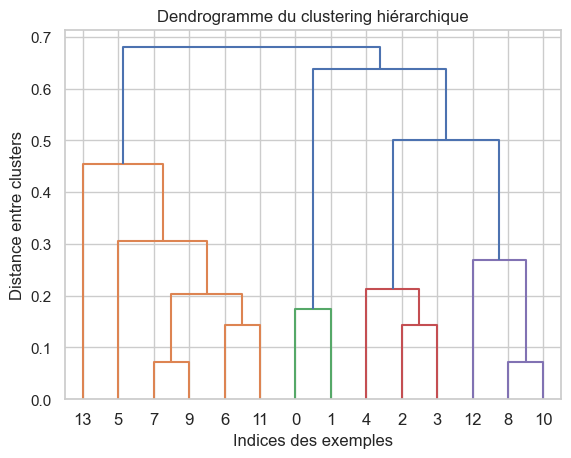

[[8, 10, np.float64(0.0714285714285714), 2],
 [7, 9, np.float64(0.07142857142857151), 2],
 [2, 3, np.float64(0.14285714285714285), 2],
 [6, 11, np.float64(0.1428571428571429), 2],
 [0, 1, np.float64(0.17437936593905287), 2],
 [15, 17, np.float64(0.20316375219039837), 4],
 [4, 16, np.float64(0.21237241067597867), 3],
 [12, 14, np.float64(0.26811891970176366), 3],
 [5, 19, np.float64(0.3047456282855976), 5],
 [13, 22, np.float64(0.4542857142857144), 6],
 [20, 21, np.float64(0.5000000000000001), 6],
 [18, 24, np.float64(0.638139657302555), 8],
 [23, 25, np.float64(0.6796842379114776), 14]]

In [56]:
CHA_centroid(data_2D_norm,dendrogramme=True)

### Variantes : complete linkage, simple linkage, average linkage

<font size="+1" color="RED"><b>[Q]</b></font> Ecrire 3 nouvelles fonctions `CHA_complete`, `CHA_simple` et `CHA_average` qui implémentent le clustering hiérarchique basé le linkage correspondant.


Puis afficher et comparer les dendrogrammes obtenus par les 4 approches de clustering implémentées.

In [57]:
def dist_max(group1, group2):
    """Calcule la distance maximale entre deux groupes d'exemples."""
    max_dist = -np.inf
    for i in group1:
        for j in group2:
            d = dist_euclidienne(i, j)
            if d > max_dist:
                max_dist = d
    return max_dist

def dist_min(group1, group2):
    """Calcule la distance minimale entre deux groupes d'exemples."""
    min_dist = np.inf
    for i in group1:
        for j in group2:
            d = dist_euclidienne(i, j)
            if d < min_dist:
                min_dist = d
    return min_dist

def dist_average(group1, group2):
    """Calcule la distance moyenne entre deux groupes d'exemples."""
    total_dist = 0
    count = 0
    for i in group1:
        for j in group2:
            d = dist_euclidienne(i, j)
            total_dist += d
            count += 1
    return total_dist / count

def CHA_complete(df, verbose=False, dendrogramme=False):
    """Clustering hiérarchique ascendant avec linkage complet."""
    P = initialise_CHA(df)
    fusion_results = []
    Z = []

    while len(P) > 1:
        c1, c2 = None, None
        d_min = float("inf")

        clusters = list(P.keys())
        for i, j in itertools.combinations(clusters, 2):
            d = dist_max(df.iloc[P[i]].values, df.iloc[P[j]].values)
            if d < d_min:
                d_min = d
                c1, c2 = i, j

        new_cluster = P[c1] + P[c2]
        P1 = {k: v for k, v in P.items() if k not in (c1, c2)}
        new_key = max(P.keys()) + 1
        P1[new_key] = new_cluster
        P = P1

        fusion_results.append([c1, c2, d_min, len(P[new_key])])
        Z.append([c1, c2, d_min, len(P[new_key])])

        if verbose:
            print(f"CHA_complete: Fusion des clusters {c1} et {c2} à une distance de {d_min:.16f}")

    if dendrogramme:
        plt.figure()
        sch.dendrogram(Z)
        plt.title("Dendrogramme CHA Complet")
        plt.show()

    return fusion_results

def CHA_simple(df, verbose=False, dendrogramme=False):
    """Clustering hiérarchique ascendant avec linkage simple."""
    P = initialise_CHA(df)
    fusion_results = []
    Z = []

    while len(P) > 1:
        c1, c2 = None, None
        d_min = float("inf")

        clusters = list(P.keys())
        for i, j in itertools.combinations(clusters, 2):
            d = dist_min(df.iloc[P[i]].values, df.iloc[P[j]].values)
            if d < d_min:
                d_min = d
                c1, c2 = i, j

        new_cluster = P[c1] + P[c2]
        P1 = {k: v for k, v in P.items() if k not in (c1, c2)}
        new_key = max(P.keys()) + 1
        P1[new_key] = new_cluster
        P = P1

        fusion_results.append([c1, c2, d_min, len(P[new_key])])
        Z.append([c1, c2, d_min, len(P[new_key])])

        if verbose:
            print(f"CHA_simple: Fusion des clusters {c1} et {c2} à une distance de {d_min:.16f}")

    if dendrogramme:
        plt.figure()
        sch.dendrogram(Z)
        plt.title("Dendrogramme CHA Simple")
        plt.show()

    return fusion_results

def CHA_average(df, verbose=False, dendrogramme=False):
    """Clustering hiérarchique ascendant avec linkage moyen."""
    P = initialise_CHA(df)
    fusion_results = []
    Z = []

    while len(P) > 1:
        c1, c2 = None, None
        d_min = float("inf")

        clusters = list(P.keys())
        for i, j in itertools.combinations(clusters, 2):
            d = dist_average(df.iloc[P[i]].values, df.iloc[P[j]].values)
            if d < d_min:
                d_min = d
                c1, c2 = i, j

        new_cluster = P[c1] + P[c2]
        P1 = {k: v for k, v in P.items() if k not in (c1, c2)}
        new_key = max(P.keys()) + 1
        P1[new_key] = new_cluster
        P = P1

        fusion_results.append([c1, c2, d_min, len(P[new_key])])
        Z.append([c1, c2, d_min, len(P[new_key])])

        if verbose:
            print(f"CHA_average: Fusion des clusters {c1} et {c2} à une distance de {d_min:.16f}")

    if dendrogramme:
        plt.figure()
        sch.dendrogram(Z)
        plt.title("Dendrogramme CHA Moyen")
        plt.show()

    return fusion_results


<font size="+1" color="RED"><b>[Q]</b></font> Regrouper les 4 fonctions de clustering hiérarchique ascendant en écrivant une fonction `CHA` qui prend les mêmes arguments que chacune des 4 fonctions précédentes, et un argument suplémentaire `linkage`, qui est une chaîne de caractères parmi `"centroid"` (valeur par défaut),  `"complete"`,`"simple"`, et `"average"` et qui donne le nom de l'approche linkage à utiliser pour construire le clustering.

In [58]:
def CHA(df, linkage, verbose=False, dendrogramme=False):
    """
    Effectue le clustering hiérarchique ascendant (CHA) en utilisant différentes méthodes de linkage.

    Paramètres:
        - df : DataFrame contenant les données normalisées.
        - linkage : Chaîne de caractères spécifiant la méthode de linkage à utiliser.
                    Peut être 'centroid', 'complete', 'simple', ou 'average'.
                    Valeur par défaut : 'centroid'.
        - verbose : Booléen, affiche des messages si True.
        - dendrogramme : Booléen, affiche le dendrogramme si True.

    Retourne:
        - Une liste composée de listes contenant chacune :
            - Les 2 indices d'éléments fusionnés
            - La distance les séparant
            - La somme du nombre d'éléments des 2 éléments fusionnés
    """
    # Initialisation de la partition
    P = initialise_CHA(df)
    fusion_results = []
    Z = []

    while len(P) > 1:
        c1, c2 = None, None
        d_min = float("inf")

        clusters = list(P.keys())
        for i, j in itertools.combinations(clusters, 2):
            if linkage == 'centroid':
                d = dist_centroides(df.iloc[P[i]], df.iloc[P[j]])
            elif linkage == 'complete':
                d = dist_max(df.iloc[P[i]].values, df.iloc[P[j]].values)
            elif linkage == 'simple':
                d = dist_min(df.iloc[P[i]].values, df.iloc[P[j]].values)
            elif linkage == 'average':
                d = dist_average(df.iloc[P[i]].values, df.iloc[P[j]].values)
            else:
                raise ValueError("Méthode de linkage inconnue. Utilisez 'centroid', 'complete', 'simple', ou 'average'.")

            if d < d_min:
                d_min = d
                c1, c2 = i, j

        new_cluster = P[c1] + P[c2]
        P1 = {k: v for k, v in P.items() if k not in (c1, c2)}
        new_key = max(P.keys()) + 1
        P1[new_key] = new_cluster
        P = P1

        fusion_results.append([c1, c2, d_min, len(P[new_key])])
        Z.append([c1, c2, d_min, len(P[new_key])])

        if verbose:
            print(f"CHA ({linkage}): Fusion des clusters {c1} et {c2} à une distance de {d_min:.16f}")

    if dendrogramme:
        plt.figure()
        sch.dendrogram(Z)
        plt.title(f"Dendrogramme CHA {linkage.capitalize()}")
        plt.show()

    return fusion_results


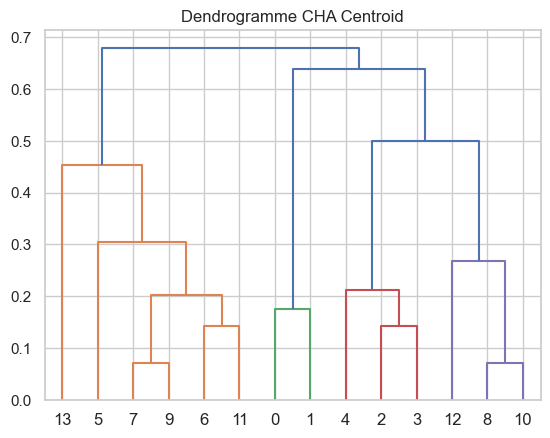

[[8, 10, np.float64(0.0714285714285714), 2],
 [7, 9, np.float64(0.07142857142857151), 2],
 [2, 3, np.float64(0.14285714285714285), 2],
 [6, 11, np.float64(0.1428571428571429), 2],
 [0, 1, np.float64(0.17437936593905287), 2],
 [15, 17, np.float64(0.20316375219039837), 4],
 [4, 16, np.float64(0.21237241067597867), 3],
 [12, 14, np.float64(0.26811891970176366), 3],
 [5, 19, np.float64(0.3047456282855976), 5],
 [13, 22, np.float64(0.4542857142857144), 6],
 [20, 21, np.float64(0.5000000000000001), 6],
 [18, 24, np.float64(0.638139657302555), 8],
 [23, 25, np.float64(0.6796842379114776), 14]]

In [59]:
CHA(data_2D_norm,linkage='centroid',dendrogramme=True)

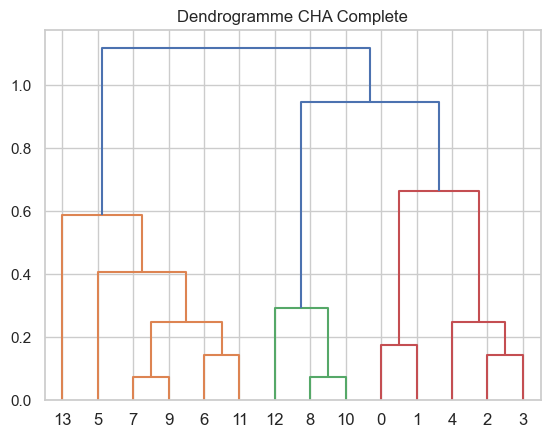

[[8, 10, np.float64(0.0714285714285714), 2],
 [7, 9, np.float64(0.07142857142857151), 2],
 [2, 3, np.float64(0.14285714285714285), 2],
 [6, 11, np.float64(0.1428571428571429), 2],
 [0, 1, np.float64(0.17437936593905287), 2],
 [15, 17, np.float64(0.2457807219155036), 4],
 [4, 16, np.float64(0.24578072191550362), 3],
 [12, 14, np.float64(0.2931183504097598), 3],
 [5, 19, np.float64(0.40632750438079696), 5],
 [13, 22, np.float64(0.5862367008195198), 6],
 [18, 20, np.float64(0.6645544771207432), 5],
 [21, 24, np.float64(0.945882591842677), 8],
 [23, 25, np.float64(1.118033988749895), 14]]

In [60]:
CHA(data_2D_norm,linkage='complete',dendrogramme=True)

CHA (simple): Fusion des clusters 8 et 10 à une distance de 0.0714285714285714
CHA (simple): Fusion des clusters 7 et 9 à une distance de 0.0714285714285715
CHA (simple): Fusion des clusters 2 et 3 à une distance de 0.1428571428571428
CHA (simple): Fusion des clusters 6 et 11 à une distance de 0.1428571428571429
CHA (simple): Fusion des clusters 0 et 1 à une distance de 0.1743793659390529
CHA (simple): Fusion des clusters 15 et 17 à une distance de 0.2000000000000000
CHA (simple): Fusion des clusters 4 et 16 à une distance de 0.2000000000000000
CHA (simple): Fusion des clusters 5 et 19 à une distance de 0.2000000000000001
CHA (simple): Fusion des clusters 12 et 14 à une distance de 0.2457807219155036
CHA (simple): Fusion des clusters 18 et 20 à une distance de 0.3322772385603716
CHA (simple): Fusion des clusters 13 et 21 à une distance de 0.3487587318781058
CHA (simple): Fusion des clusters 22 et 23 à une distance de 0.3571428571428572
CHA (simple): Fusion des clusters 24 et 25 à une d

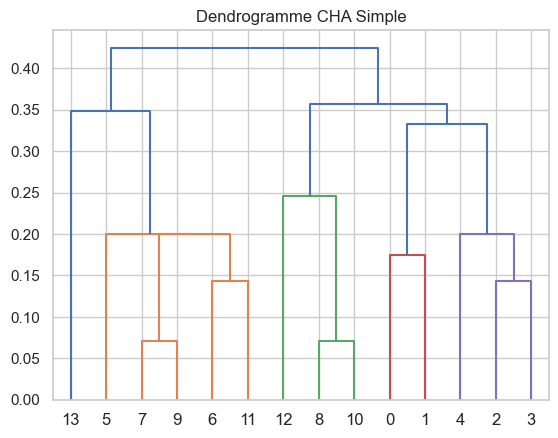

[[8, 10, np.float64(0.0714285714285714), 2],
 [7, 9, np.float64(0.07142857142857151), 2],
 [2, 3, np.float64(0.14285714285714285), 2],
 [6, 11, np.float64(0.1428571428571429), 2],
 [0, 1, np.float64(0.17437936593905287), 2],
 [15, 17, np.float64(0.19999999999999996), 4],
 [4, 16, np.float64(0.2), 3],
 [5, 19, np.float64(0.20000000000000007), 5],
 [12, 14, np.float64(0.2457807219155036), 3],
 [18, 20, np.float64(0.3322772385603716), 5],
 [13, 21, np.float64(0.3487587318781058), 6],
 [22, 23, np.float64(0.3571428571428572), 8],
 [24, 25, np.float64(0.4247448213519573), 14]]

In [61]:
CHA(data_2D_norm,linkage='simple',verbose=True,dendrogramme=True)

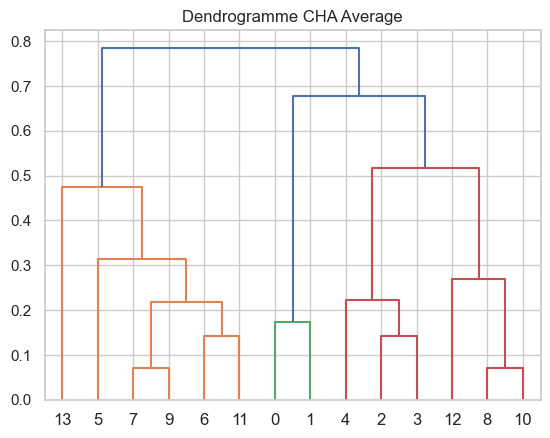

[[8, 10, np.float64(0.0714285714285714), 2],
 [7, 9, np.float64(0.07142857142857151), 2],
 [2, 3, np.float64(0.14285714285714285), 2],
 [6, 11, np.float64(0.1428571428571429), 2],
 [0, 1, np.float64(0.17437936593905287), 2],
 [15, 17, np.float64(0.2176313858168652), 4],
 [4, 16, np.float64(0.22289036095775183), 3],
 [12, 14, np.float64(0.2694495361626317), 3],
 [5, 19, np.float64(0.31302705657407515), 5],
 [13, 22, np.float64(0.4745491993187841), 6],
 [20, 21, np.float64(0.5175575371779451), 6],
 [18, 24, np.float64(0.6770324690297006), 8],
 [23, 25, np.float64(0.784963189028133), 14]]

In [62]:
CHA(data_2D_norm,linkage='average',dendrogramme=True)

### Une base pour voir les différences

Etudier les différences de résultats obtenus avec chacune des approches de linkage sur la base suivante.

In [63]:
data_2D_diff = normalisation(pd.read_csv("data/base-2D-diff.csv"))

In [64]:
data_2D_diff

,X1,X2
0,0.000000,0.000000
1,0.000000,0.166667
2,0.133333,0.000000
3,0.133333,0.166667
4,0.133333,0.333333
5,0.266667,0.166667
6,0.266667,0.333333
7,0.266667,0.500000
8,0.400000,0.166667
9,0.400000,0.333333


In [65]:
data_2D_diff_normalized = normalisation(data_2D_diff)

# Extraction des valeurs des colonnes X1 et X2
X1_values = data_2D_diff_normalized['X1'].values
X2_values = data_2D_diff_normalized['X2'].values

Il y a 23 exemples dans la base.


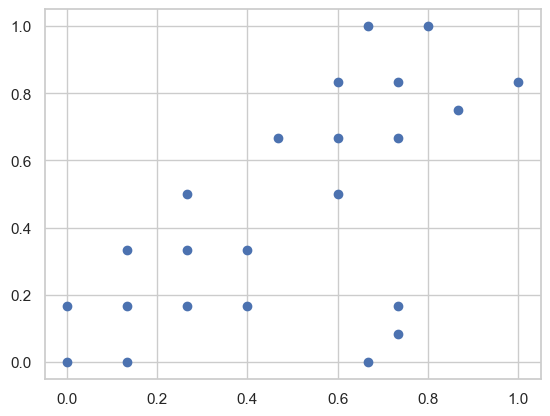

In [66]:
print("Il y a", len(data_2D_diff), "exemples dans la base.")

plt.scatter(X1_values,X2_values)


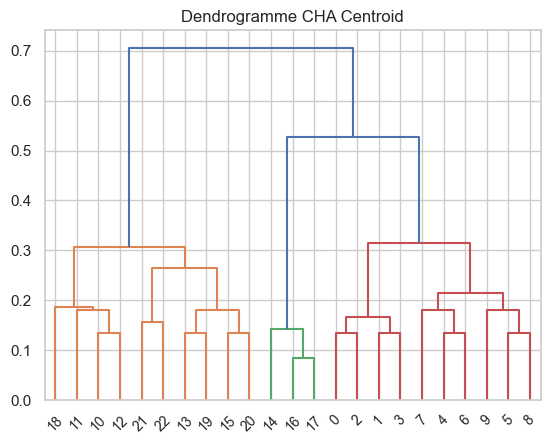

In [67]:
res_centroid = CHA(data_2D_diff,linkage='centroid',dendrogramme=True)

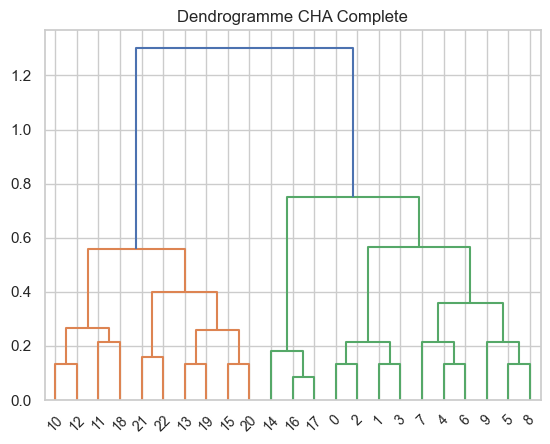

In [68]:
res_complete = CHA(data_2D_diff,linkage='complete',dendrogramme=True)

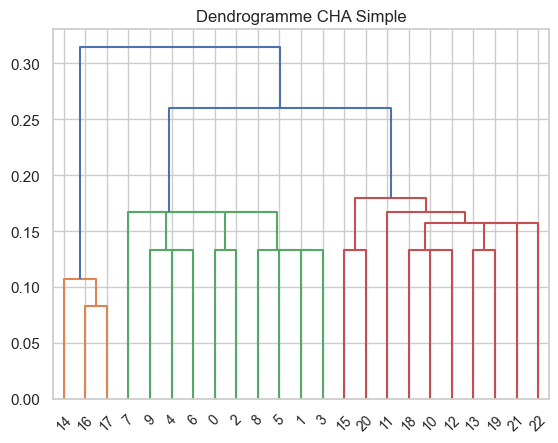

In [69]:
res_simple = CHA(data_2D_diff,linkage='simple',dendrogramme=True)

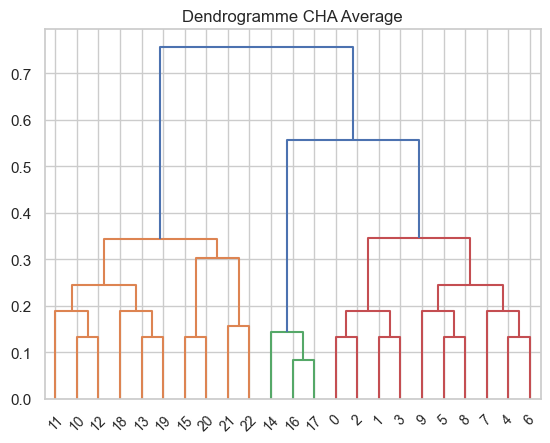

In [70]:
res_average = CHA(data_2D_diff,linkage='average',dendrogramme=True)

## Ajout des fonctions dans la librairie `iads`

<font size="+1" color="RED"><b>[Q]</b></font> Ajouter les fonctions de clustering dans votre librairie `iads`. Pour cela, créer un nouveau fichier de nom `Clustering.py` dans votre répertoire `iads`. 
Utiliser les premières lignes du fichier `Classifiers.py` pour débuter votre fichier `Clustering.py`, puis rajouter dans ce fichier les fonctions de clustering hiérarchique (tous linkages) de ce notebook, ainsi que les fonctions qu'elles utilisent.

Deja fait

## Phase 2 : application à des données réelles

### Données: traitement des déchets de la ville de Paris

Pour tester votre implémentation, vous allez utiliser les données publiques de traitement des déchets de la ville de Paris qui sont fournies dans le fichier `base-Paris.csv`.

**Attention**: il faut préparer cette base afin de pouvoir appliquer l'algorithme de clustering: en particulier, certaines colonnes (Granularité, Total...) ne sont pas à utilisables dans le calcul des distances, il faut donc les éliminer. Il faut aussi prévoir de conserver le nom de l'arrondissement afin de pouvoir à la fin analyser le résultat du clustering.


<font size="+1" color="RED"><b>[Q]</b></font> Etudier cette base et les clusters qui peuvent être mis en évidence.


In [71]:
data_Paris = pd.read_csv("data/base-Paris.csv")

In [72]:
data_Paris

,Granularité,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11,Total-2011
0,75001,75.3,60.4,71.2,59.5,73.9,72.0,57.9,56.4,75.5,75.7,65.8,79.1,822.7
1,75002,153.0,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8,1592.5
2,75003,183.9,173.1,204.2,183.0,203.2,181.9,191.2,153.6,208.6,186.5,192.9,189.9,2252.0
3,75004,116.3,115.7,133.4,115.0,123.2,120.5,114.5,97.6,130.5,123.0,124.3,133.7,1447.7
4,75005,247.0,211.0,251.0,218.0,185.0,224.0,213.3,162.9,203.4,232.1,227.6,251.6,2626.9
5,75006,222.0,189.0,218.0,192.0,180.0,199.0,171.8,134.8,183.1,195.5,213.8,204.1,2303.1
6,75007,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1,3271.2
7,75008,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4,2764.3
8,75009,208.3,197.1,220.4,197.9,151.7,206.9,199.9,163.3,223.8,203.6,213.8,235.7,2422.4
9,75010,273.0,248.6,292.2,255.2,284.3,267.3,246.6,210.3,280.6,275.6,284.6,283.2,3201.5


<font size="+1" color="RED"><b>[Q]</b></font> Préparer un rapport d'analyse (c'est-à-dire, compléter votre notebook en rajoutant à la suite tout un ensemble d'expérimentations et de résultats obtenus sur la base) réalisé sur cette base qui mette en évidence les clusters existants à différents niveaux de distance, et en utilisant différentes distances.


  Granularité  janv-11  févr-11  mars-11  avr-11  mai-11  juin-11  juil-11  \
0       75001     75.3     60.4     71.2    59.5    73.9     72.0     57.9   
1       75002    153.0    125.8    136.6   126.6   133.2    127.6    126.7   
2       75003    183.9    173.1    204.2   183.0   203.2    181.9    191.2   
3       75004    116.3    115.7    133.4   115.0   123.2    120.5    114.5   
4       75005    247.0    211.0    251.0   218.0   185.0    224.0    213.3   

   août-11  sept-11  oct-11  nov-11  déc-11  Total-2011  
0     56.4     75.5    75.7    65.8    79.1       822.7  
1    114.3    144.3   145.1   129.5   129.8      1592.5  
2    153.6    208.6   186.5   192.9   189.9      2252.0  
3     97.6    130.5   123.0   124.3   133.7      1447.7  
4    162.9    203.4   232.1   227.6   251.6      2626.9  


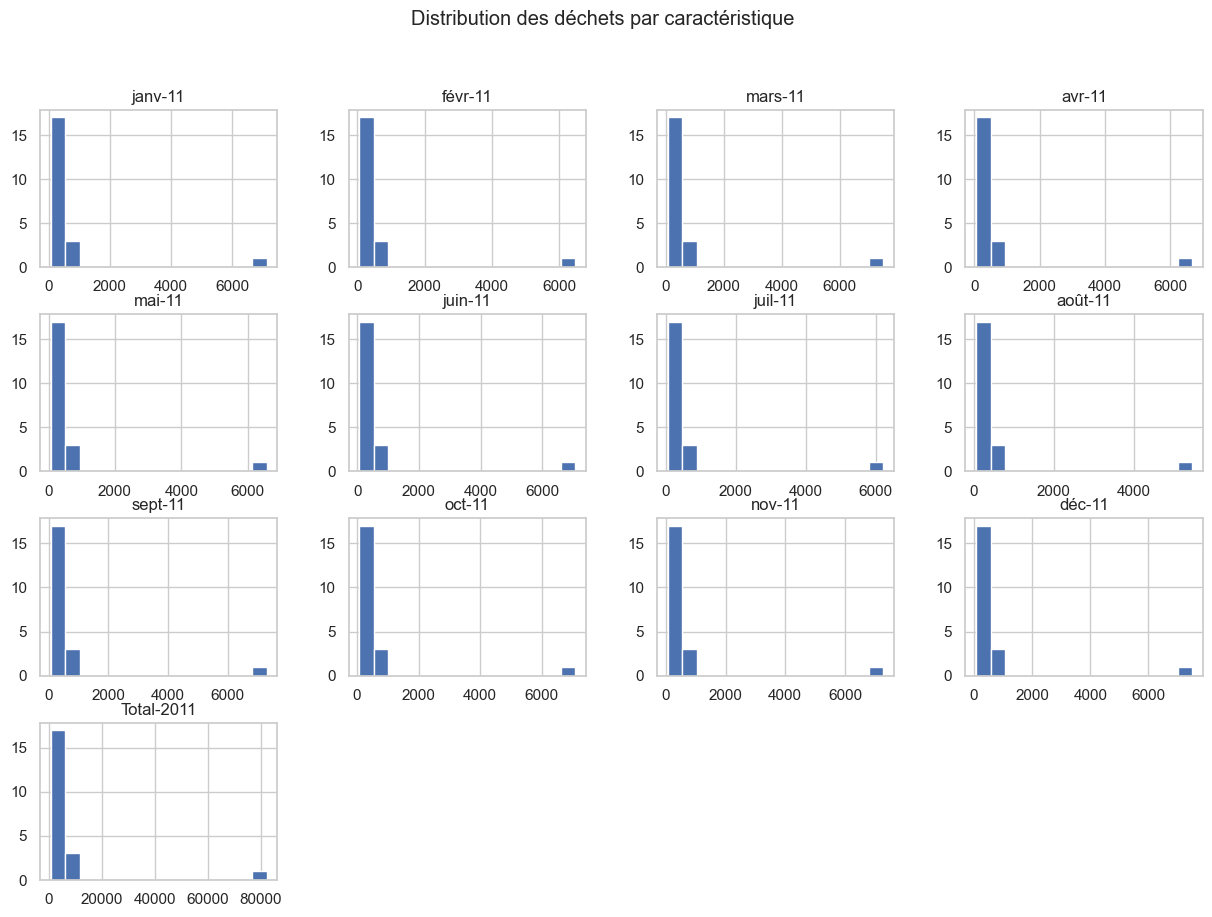

In [73]:
# Affichage des premières lignes des données
print(data_Paris.head())

# Visualisation de la distribution des déchets
data_Paris.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution des déchets par caractéristique')
plt.show()


    janv-11   févr-11   mars-11    avr-11    mai-11   juin-11   juil-11  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.011007  0.010215  0.008783  0.010171  0.009138  0.007953  0.011165   
2  0.015385  0.017603  0.017861  0.018720  0.019924  0.015720  0.021632   
3  0.005808  0.008638  0.008353  0.008413  0.007597  0.006937  0.009185   
4  0.024324  0.023523  0.024147  0.024026  0.017120  0.021742  0.025218   

    août-11   sept-11    oct-11    nov-11    déc-11  
0  0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.010707  0.009528  0.009902  0.008816  0.006839  
2  0.017975  0.018433  0.015808  0.017590  0.014945  
3  0.007619  0.007617  0.006749  0.008096  0.007365  
4  0.019695  0.017713  0.022314  0.022392  0.023268  


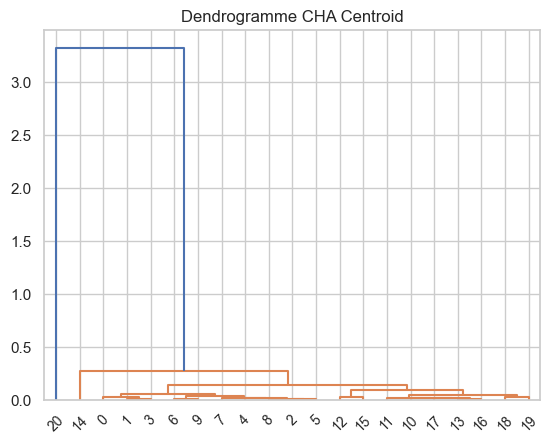

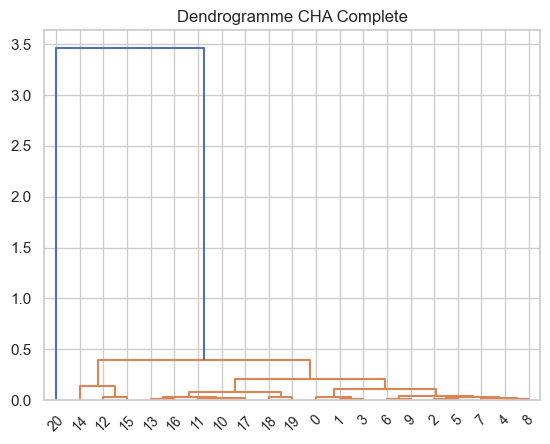

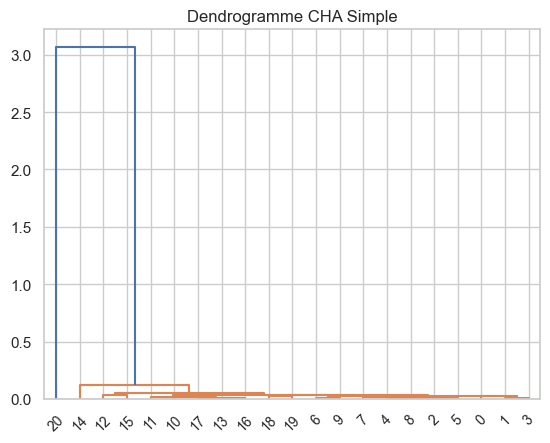

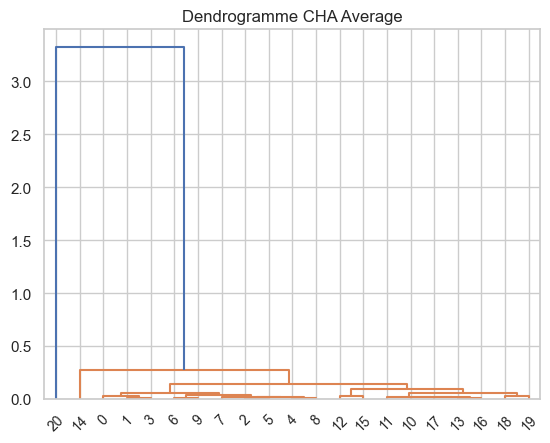

[[6, 9, np.float64(0.006893662525242474), 2],
 [1, 3, np.float64(0.008003004042686746), 2],
 [2, 5, np.float64(0.010368796637369745), 2],
 [13, 16, np.float64(0.010687341105052482), 2],
 [4, 8, np.float64(0.01143470863592969), 2],
 [23, 25, np.float64(0.014715792138430873), 4],
 [17, 24, np.float64(0.015269455004667691), 3],
 [10, 27, np.float64(0.01911383664833853), 4],
 [7, 26, np.float64(0.020249051387155756), 5],
 [11, 28, np.float64(0.02249289409871367), 5],
 [18, 19, np.float64(0.02782031038635054), 2],
 [0, 22, np.float64(0.030045202656483194), 3],
 [12, 15, np.float64(0.0316851068029653), 2],
 [21, 29, np.float64(0.03431184716622576), 7],
 [30, 31, np.float64(0.05150961741186853), 7],
 [32, 34, np.float64(0.06020177511631758), 10],
 [33, 35, np.float64(0.09104041866763919), 9],
 [36, 37, np.float64(0.13762352448273987), 19],
 [14, 38, np.float64(0.272340404593546), 20],
 [20, 39, np.float64(3.3241600047351865), 21]]

In [74]:
# Suppression des colonnes non pertinentes
columns_to_drop = ['Granularité', 'Total-2011']
data_Paris_cleaned = data_Paris.drop(columns=columns_to_drop)

# Normalisation des données
data_Paris_normalized = normalisation(data_Paris_cleaned)

# Affichage des données normalisées
print(data_Paris_normalized.head())

# Application du clustering hiérarchique
CHA(data_Paris_normalized, linkage='centroid', dendrogramme=True)
CHA(data_Paris_normalized, linkage='complete', dendrogramme=True)
CHA(data_Paris_normalized, linkage='simple', dendrogramme=True)
CHA(data_Paris_normalized, linkage='average', dendrogramme=True)


### Rapport d'Analyse : Clustering des Données de Traitement des Déchets de Paris

#### 1. Introduction
- **Objectif** : Analyser les données de traitement des déchets de la ville de Paris pour identifier des clusters d'arrondissements ayant des caractéristiques similaires.
- **Méthodologie** : Utilisation du clustering hiérarchique ascendant avec différentes méthodes de linkage (centroid, complete, simple, average).

#### 2. Exploration des Données
- **Description des données** : Les données contiennent des informations mensuelles sur les déchets traités dans différents arrondissements de Paris pour l'année 2011.
- **Visualisation initiale** : Graphiques montrant la distribution des déchets par arrondissement.

```python
# Visualisation de la distribution des déchets
data_Paris.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution des déchets par caractéristique')
plt.show()
```

#### 3. Préparation des Données
- **Nettoyage des données** : Suppression des colonnes non pertinentes pour le clustering.
- **Normalisation** : Application de la normalisation pour que chaque caractéristique contribue de manière égale.

```python
# Suppression des colonnes non pertinentes
columns_to_drop = ['Granularité', 'Total-2011']
data_Paris_cleaned = data_Paris.drop(columns=columns_to_drop)

# Normalisation des données
data_Paris_normalized = normalisation(data_Paris_cleaned)

# Affichage des données normalisées
print(data_Paris_normalized.head())
```

#### 4. Application du Clustering Hiérarchique
- **Méthodes de linkage** : Application des méthodes centroid, complete, simple, et average.
- **Dendrogrammes** : Affichage des dendrogrammes pour chaque méthode.

```python
# Application du clustering hiérarchique
CHA(data_Paris_normalized, linkage='centroid', dendrogramme=True)
CHA(data_Paris_normalized, linkage='complete', dendrogramme=True)
CHA(data_Paris_normalized, linkage='simple', dendrogramme=True)
CHA(data_Paris_normalized, linkage='average', dendrogramme=True)
```

#### 5. Analyse des Résultats
##### Observations :
- **Centroid** : Les clusters sont formés en fonction de la distance entre les centroïdes. Cette méthode peut être influencée par des points aberrants.
- **Complete** : Les clusters sont formés en fonction de la distance maximale entre les points, ce qui peut conduire à des clusters plus compacts.
- **Simple** : Les clusters sont formés en fonction de la distance minimale entre les points, ce qui peut conduire à des clusters plus étendus.
- **Average** : Les clusters sont formés en fonction de la distance moyenne entre tous les points, ce qui peut être un compromis entre les méthodes complètes et simples.

### Conclusion

Ce rapport fournit une analyse complète des données de traitement des déchets de la ville de Paris en utilisant le clustering hiérarchique. Les dendrogrammes montrent comment les arrondissements se regroupent en fonction de leurs caractéristiques de déchets, ce qui peut aider à identifier des tendances et à prendre des décisions informées pour la gestion des déchets.